# 1. Problem Statement <a id='Problem Statement'></a>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# 2. Table of Content  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>


- <a href='#Table of Contents'>2. Table of Contents</a>

- <a href='#Data Dictionary'>3. Data Dictionary</a>

- <a href='#Data Imports'>3. Library Imports</a>

- <a href='#Load Data'>4. Load Data</a>

- <a href='#Data Preparation'>5. Data Preparation</a>
    
- <a href='#Visualise Data'>6. Visualise Data</a>   
    - <a href='#Visualise Numerical Columns'>6.1 Visualise Numerical Columns </a>
    - <a href='#Visualise Categorical Columns'>6.1 Visualise Categorical Columns </a>
    
- <a href='#Feature Engineering'>7. Feature Engineering </a>   

- <a hreaf='#Categorical To Dummy'>8. Converting categorical columns to dummy variables></a>
    
- <a href='#Train Test Split'>9. Train - Test Split</a>
    
- <a href='#Feature Scaling'>10. Feature Scaling</a>
    - <a href='#Min Max Scalar'>10.1 Apply MinMaxScaler on all continuous numerical features</a>
    
- <a href='#Divide into X and Y'>11. Divide into X and Y for model building</a>
    
- <a href='#Heatmap'>12. Check for heatmap</a>
    - <a href='#Correlation Matrix'>12.1 Correlation matrix</a>
    
- <a href='#Linear Regression-RFE'>13. Build Linear Regression model - Use RFE</a>
    
- <a href='#Stats Model-RFE'>14. Build stats model using RFE selected features</a>
    - <a href='#Common Function for model building'>14.1 Common Function for model building</a>
    
- <a href='#Build Model'>15. Build Model</a>
    - <a href='#Model 1'>15.1 Model 1</a>
        - <a href='#Important Assumptions'>15.1a Important Assumptions</a>
    - <a href='#Model 2'>15.2 Model 2</a>
    - <a href='#Model 3'>15.3 Model 3</a>
    - <a href='#Model 4'>15.4 Model 4</a>
    - <a href='#Model 5'>15.5 Model 5</a>
    - <a href='#Model 6'>15.6 Model 6</a>
    - <a href='#Model 7'>15.7 Model 7</a>
    - <a href='#Model 8'>15.8 Model 8</a>
    - <a href='#Model 9'>15.9 Model 9</a>
    - <a href='#Model 10'>15.10 Model 10</a>
    - <a href='#Model 11'>15.11 Model 11</a>
    - <a href='#Model 12'>15.12 Model 12</a>
    - <a href='#Model 13'>15.13 Model 13</a>
    - <a href='#Model 14'>15.14 Model 14 Final Model</a>

- <a href='#Residual Analysis'>16. Residual Analysis of the train data</a>
    
- <a href='#Predictions'>17. Make predictions using final model</a>
    
- <a href='#Model Evaluation'>18. Model Evaluation and Summary</a>
    - <a href='#r2 score'>18.1 r2-score</a>
    - <a href='#rmse'>18.2 RMSE (root mean squared error)</a>
    - <a href='#residual vs prediction'>18.3 Residuals vs. Predictions</a>
    - <a href='#top predictors and coefficients'>18.4 Top predictors and coefficients</a>

<h1>3. Data Dictionary of Car Price Dataset</h1>  <a id='Data Dictionary'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

|Feature|Type|Description|
|---|---|---|
|Car_ID|int64|Unique id of each observation (Interger)|
|symboling|object|Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) |
|CarName|object|Name of car company and car model (Categorical)|
|fueltype|object|Car fuel type i.e gas or diesel (Categorical)|
|aspiration|object|Aspiration used in a car (Categorical)|
|doornumber|object|Number of doors in a car (Categorical)|
|carbody|object|body of car (Categorical)|
|drivewheel|object|type of drive wheel (Categorical)|
|enginelocation|object|Location of car engine (Categorical)|
|wheelbase|float64|Weelbase of car (Numeric)|
|carlength|float64|Length of car (Numeric)|
|carwidth|float64|Width of car (Numeric)|
|carheight|float64|height of car (Numeric)|
|curbweight|int64|The weight of a car without occupants or baggage. (Numeric)|
|enginetype|object|Type of engine. (Categorical)|
|cylindernumber|object|cylinder placed in the car (Categorical)|
|enginesize|int64|Size of car (Numeric)|
|fuelsystem|object|Fuel system of car (Categorical)|
|boreratio|float64|Boreratio of car (Numeric)|
|stroke|float64|Stroke or volume inside the engine (Numeric)|
|compressionratio|float64|compression ratio of car (Numeric)|
|horsepower|int64|Horsepower (Numeric)|
|peakrpm|int64|car peak rpm (Numeric)|
|citympg|int64|Mileage in city (Numeric)|
|highwaympg|int64|Mileage on highway (Numeric)|
|price|float64|Price of car (Dependent variable)(Numeric)|

# 3. Library Imports  <a id='Data Imports'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [162]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

plt.style.use('ggplot')

In [163]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# 4. Reading and understanding data<a id='Load Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [164]:
carprice_df = pd.read_csv('./dataset/CarPrice_Assignment.csv')
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [165]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Observations from dataframe info
- From above cell it can be seen that there are no null columns
- Also it can be seen that column symboling is numeric column. As per data dictionary, it must be a categorical column. Column descriptionn given is:
    - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
    - So column symboling must be converted to object datatype

In [166]:
## Lets bring price column in front
carprice_df = carprice_df[ ['price'] + [ col for col in carprice_df.columns if col != 'price' ] ]
carprice_df.head()

,price,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,16500.0,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,16500.0,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,13950.0,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,17450.0,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


# 5. Data Preparation<a id='Data Preparation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Convert column symboling to categorical column

In [167]:
carprice_df['symboling'] = carprice_df['symboling'].astype('object')
carprice_df['symboling'].dtype

dtype('O')

## Drop car_ID as its the unique Id of each observation and will be of no help in modeling

In [168]:
carprice_df.drop(columns='car_ID',inplace=True)

In [169]:
carprice_df.describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,7988.852332,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,7788.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,10295.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,16503.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,45400.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


###  Car Name is a combination of two:
- company
- model
- We will segregate Car Name with compnay name and model
- Since the price of car is determined only by Company Name so we will drop model 
- Finally we will drop CarName column 

In [170]:
#Filter company name from CarName column
carprice_df['company'] = carprice_df['CarName'].str.split(' ', 1).str[0]
#drop CarName column
carprice_df.drop(columns='CarName',inplace=True)
carprice_df.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
0,13495.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,16500.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,16500.0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,13950.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,17450.0,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [171]:
# Check for the list of categorical columns
cat_columns = [col for col in carprice_df.columns if carprice_df[col].dtype=='object']
cat_columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [172]:
## Check for value counts of categorical columns
for col in cat_columns:
    print('*********************')
    print('column: {0} has {1} distinct values'.format(col,len(carprice_df[col].value_counts())))
    print(carprice_df[col].value_counts().sort_index())

*********************
column: symboling has 6 distinct values
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
Name: symboling, dtype: int64
*********************
column: fueltype has 2 distinct values
diesel     20
gas       185
Name: fueltype, dtype: int64
*********************
column: aspiration has 2 distinct values
std      168
turbo     37
Name: aspiration, dtype: int64
*********************
column: doornumber has 2 distinct values
four    115
two      90
Name: doornumber, dtype: int64
*********************
column: carbody has 5 distinct values
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64
*********************
column: drivewheel has 3 distinct values
4wd      9
fwd    120
rwd     76
Name: drivewheel, dtype: int64
*********************
column: enginelocation has 2 distinct values
front    202
rear       3
Name: enginelocation, dtype: int64
*********************
column: enginetype has 7 distinct values
do

## Observations from above listing of categorical columns:
- drivewheel has 3 values ('fwd','rwd','4wd'). It seems
    - 'fwd' has been mis-spelled as '4wd'. So we will replace '4wd' with 'fwd'
- company has 28 distinct values. It seems
    - 'nissan' has two values 'nissan' and 'Nissan'. We will replace 'Nissan' with 'nissan' to align it with other values
    - 'mazda' has been mis-spelled as 'maxda'. We will replace it with 'mazda'
    - 'porsche' has been mis-spelled as 'porcshce'. We will replace it with 'porsche'
    - 'toyota' has been mis-spelled as 'toyouta'. We will replace it with 'toyota'
    - 'volkswagen' has been mis-spelled as 'vokswagen', 'vw'. We will replace it with 'vokswagen'

### Function to replace old values with new values

In [173]:
# function to replace old values with new values
def replace_val(col,val_dict,df):
    for oldval,newval in val_dict.items():
        df[col].replace(oldval,newval,inplace=True)
    return df

In [174]:
#correct drivewheel values 
carprice_df = replace_val('drivewheel',{'4wd':'fwd'},carprice_df)
carprice_df['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [175]:
#correct company values
carprice_df = replace_val('company',{'Nissan':'nissan',
                                     'maxda':'mazda',
                                     'porcshce':'porsche',
                                     'toyouta':'toyota',
                                     'vokswagen':'volkswagen',
                                     'vw':'volkswagen'},carprice_df)
carprice_df['company'].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: company, dtype: int64

# 6. Data Visualisation<a id='Visualise Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 6.1 Visualise numerical columns<a id='Visualise Numerical Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [176]:
#do the pairplot of selected features
def pairplot_features(df,numeric_features,target):
    features_count = len(numeric_features)
    for i in range(0,features_count,2):
        if (i+1)<features_count:
            g=sns.pairplot(df, kind='reg', x_vars=numeric_features[i:i+2],y_vars = target)
        else:
            g=sns.pairplot(df, kind='reg', x_vars=numeric_features[i],y_vars = target)
        g.fig.set_size_inches(10,5)

In [177]:
#list of all numerical features
numeric_features = list(carprice_df.select_dtypes(include=np.number))
numeric_features.remove('price')
numeric_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

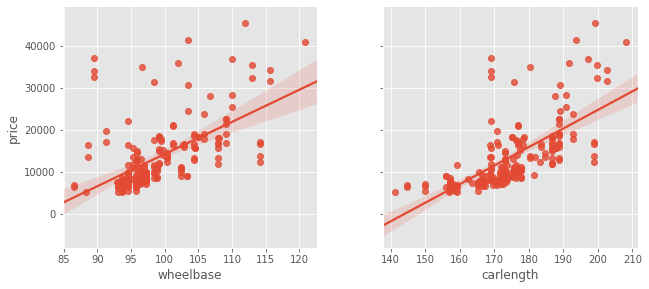

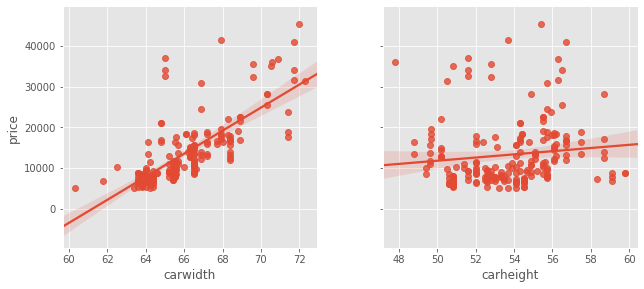

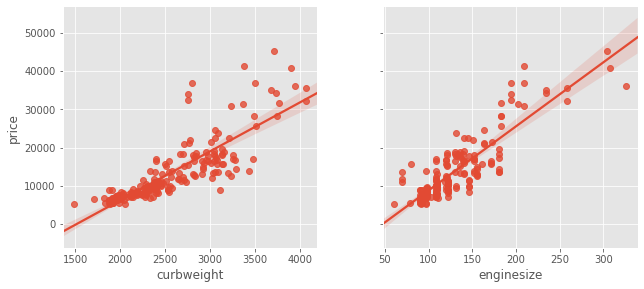

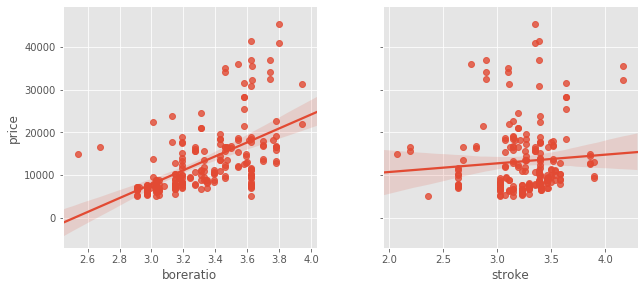

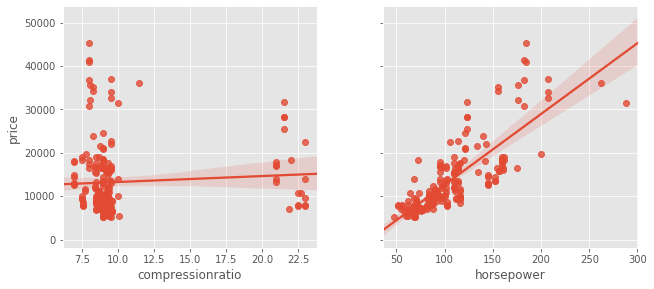

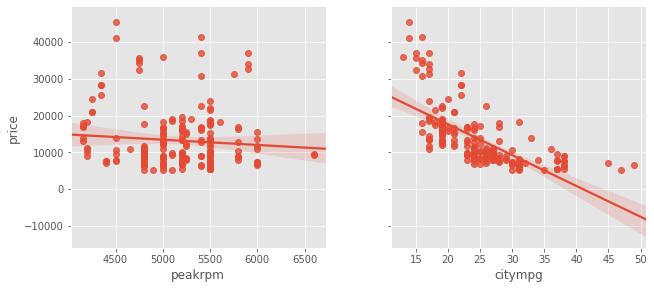

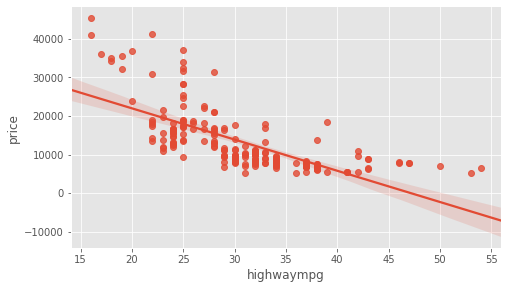

In [178]:
#sns.pairplot(carprice_df);
pairplot_features(carprice_df,numeric_features,'price')

## Observations from above plot
- It seems curbweight, enginesize, horsepower, carwidth have positive correlation with price column
- citympg, highwaympg, perkrmp seems to have negative correlation with price column

## Lets check for correlation of these numeric columns with price

In [179]:
carprice_corr = carprice_df.corr()
carprice_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)


,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1,0.577816,0.68292,0.759325,0.119336,0.835305,0.874145,0.553173,0.0794431,0.0679835,0.808139,-0.0852672,-0.685751,-0.697599
wheelbase,0.577816,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.68292,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.759325,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.55915,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.119336,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.171071,-0.0553067,0.261214,-0.108802,-0.320411,-0.0486396,-0.107358
curbweight,0.835305,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.64848,0.16879,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,0.874145,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.583774,0.203129,0.0289714,0.809769,-0.24466,-0.653658,-0.67747
boreratio,0.553173,0.48875,0.606454,0.55915,0.171071,0.64848,0.583774,1,-0.055909,0.00519734,0.573677,-0.254976,-0.584532,-0.587012
stroke,0.0794431,0.160959,0.129533,0.182942,-0.0553067,0.16879,0.203129,-0.055909,1,0.18611,0.0809395,-0.0679638,-0.0421448,-0.0439309
compressionratio,0.0679835,0.249786,0.158414,0.181129,0.261214,0.151362,0.0289714,0.00519734,0.18611,1,-0.204326,-0.435741,0.324701,0.265201


In [180]:
## Find highly correlated columns wrt target variable and correlation coefficient
carprice_corr[abs(carprice_corr['price'])>0.5]['price'].sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

## Observations from above correlation matrix
- It can be clearly seen that variables enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio share a positive correlation with target variable price. 
- enginesize,curbweight,horsepower,carwidth, carlength seem to have a strong correlation with target variable price
- citympg and highwaympg share strong negative correlation with target variable price. 
- peakrpm also has a negative correlation with target variable price but the correlation coefficient is not that significant

## Lets check target column price for outliers, distribution, mean, meadin etc

## Function to Check for distribution of numeirc columns

In [181]:
plt.style.use('ggplot')
def subplot_histograms(dist_df, list_of_columns, cols = 2):
    nrows = int(np.ceil(len(list_of_columns)/cols)) # Makes sure you have enough rows
    
    #Scales the height of the fig to accomodate a long list of features    
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=(25, len(list_of_columns)*(10/cols)),squeeze=False) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        try:
            sns.distplot(dist_df[column], ax=ax[i],fit=norm, kde=True) 
            mean_val = dist_df[column].mean()

            #runs D’Agostino's normality test to print on graph
            #The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, 
            #to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.
            #Skew is a quantification of how much a distribution is pushed left or right, 
            #a measure of asymmetry in the distribution.
            #Kurtosis quantifies how much of the distribution is in the tail. 
            #It is a simple and commonly used statistical test for normality.
            
            normality_test = stats.normaltest(dist_df[column]).pvalue < 0.05
            ax[i].set_title("Histogram for {}".format(list_of_columns[i]),color='blue')
            ax[i].set_xlabel(list_of_columns[i]) 
            ax[i].axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
            ax[i].text(0.75, 0.83, "Normal: {}".format(not normality_test), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)
            ax[i].legend()
        except:
            ax[i].text(0.75, 0.5, "Could not plot {}".format(column), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

In [182]:
#Lets check for different percentiles to get a fair idea of how observations are distributed
carprice_df[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
85%,18500.000000
90%,22563.000000
100%,45400.000000


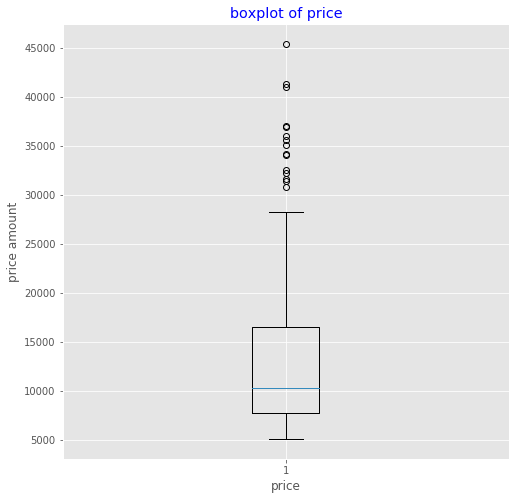

In [183]:
plt.figure(figsize=(8,8))
plt.boxplot(carprice_df['price']);
plt.title('boxplot of price',color='blue')
plt.xlabel('price')
plt.ylabel('price amount');

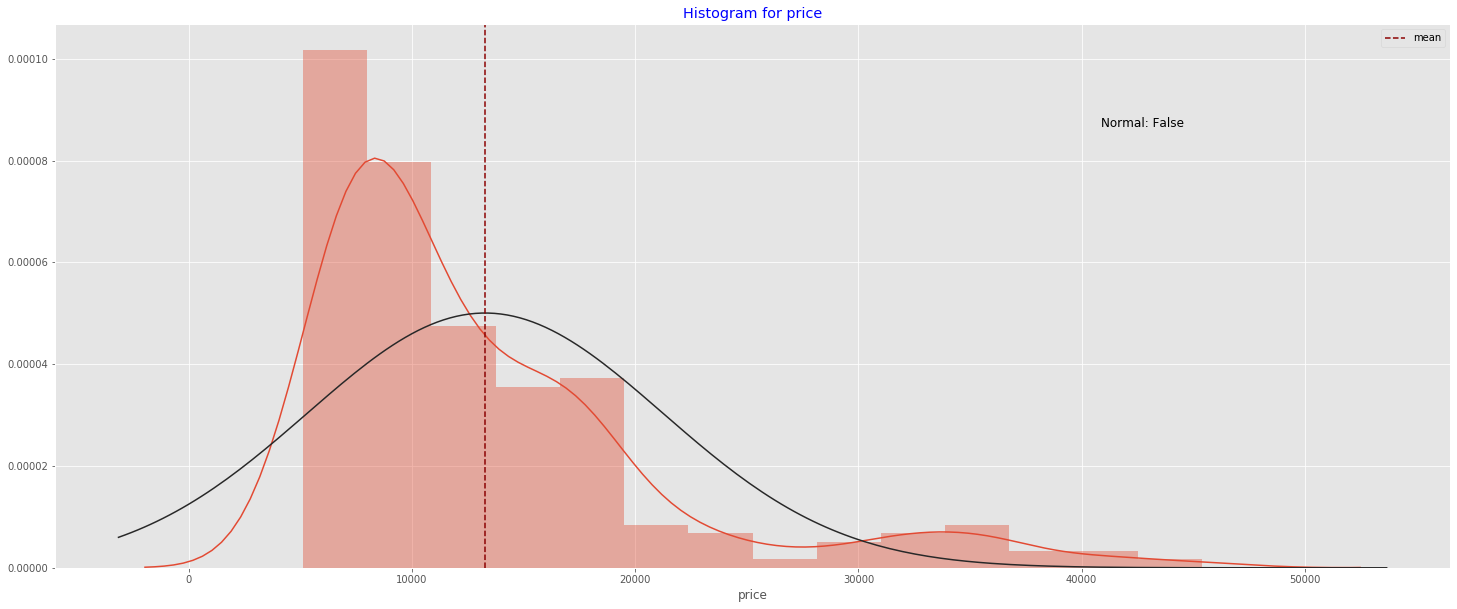

In [184]:
#subplot_histograms(carprice_df, num_features, cols = 2)
subplot_histograms(carprice_df, ['price'], cols = 1)

## Observation from above plots
- the ditribution of price column is not normal
- its right skewed. This means most of the obseravtions have price 16000. It can be seen from percentile description as well
- the mean of distribtion is around 13000 while the median is around 10000
- There are many observations far from mean meaning high variance. 85% of observations have price values below 18500 while remaining 15% are within range of [18500,45400]. Clearly there are many outliers

## Lets visualise the distibution of other numerical columns

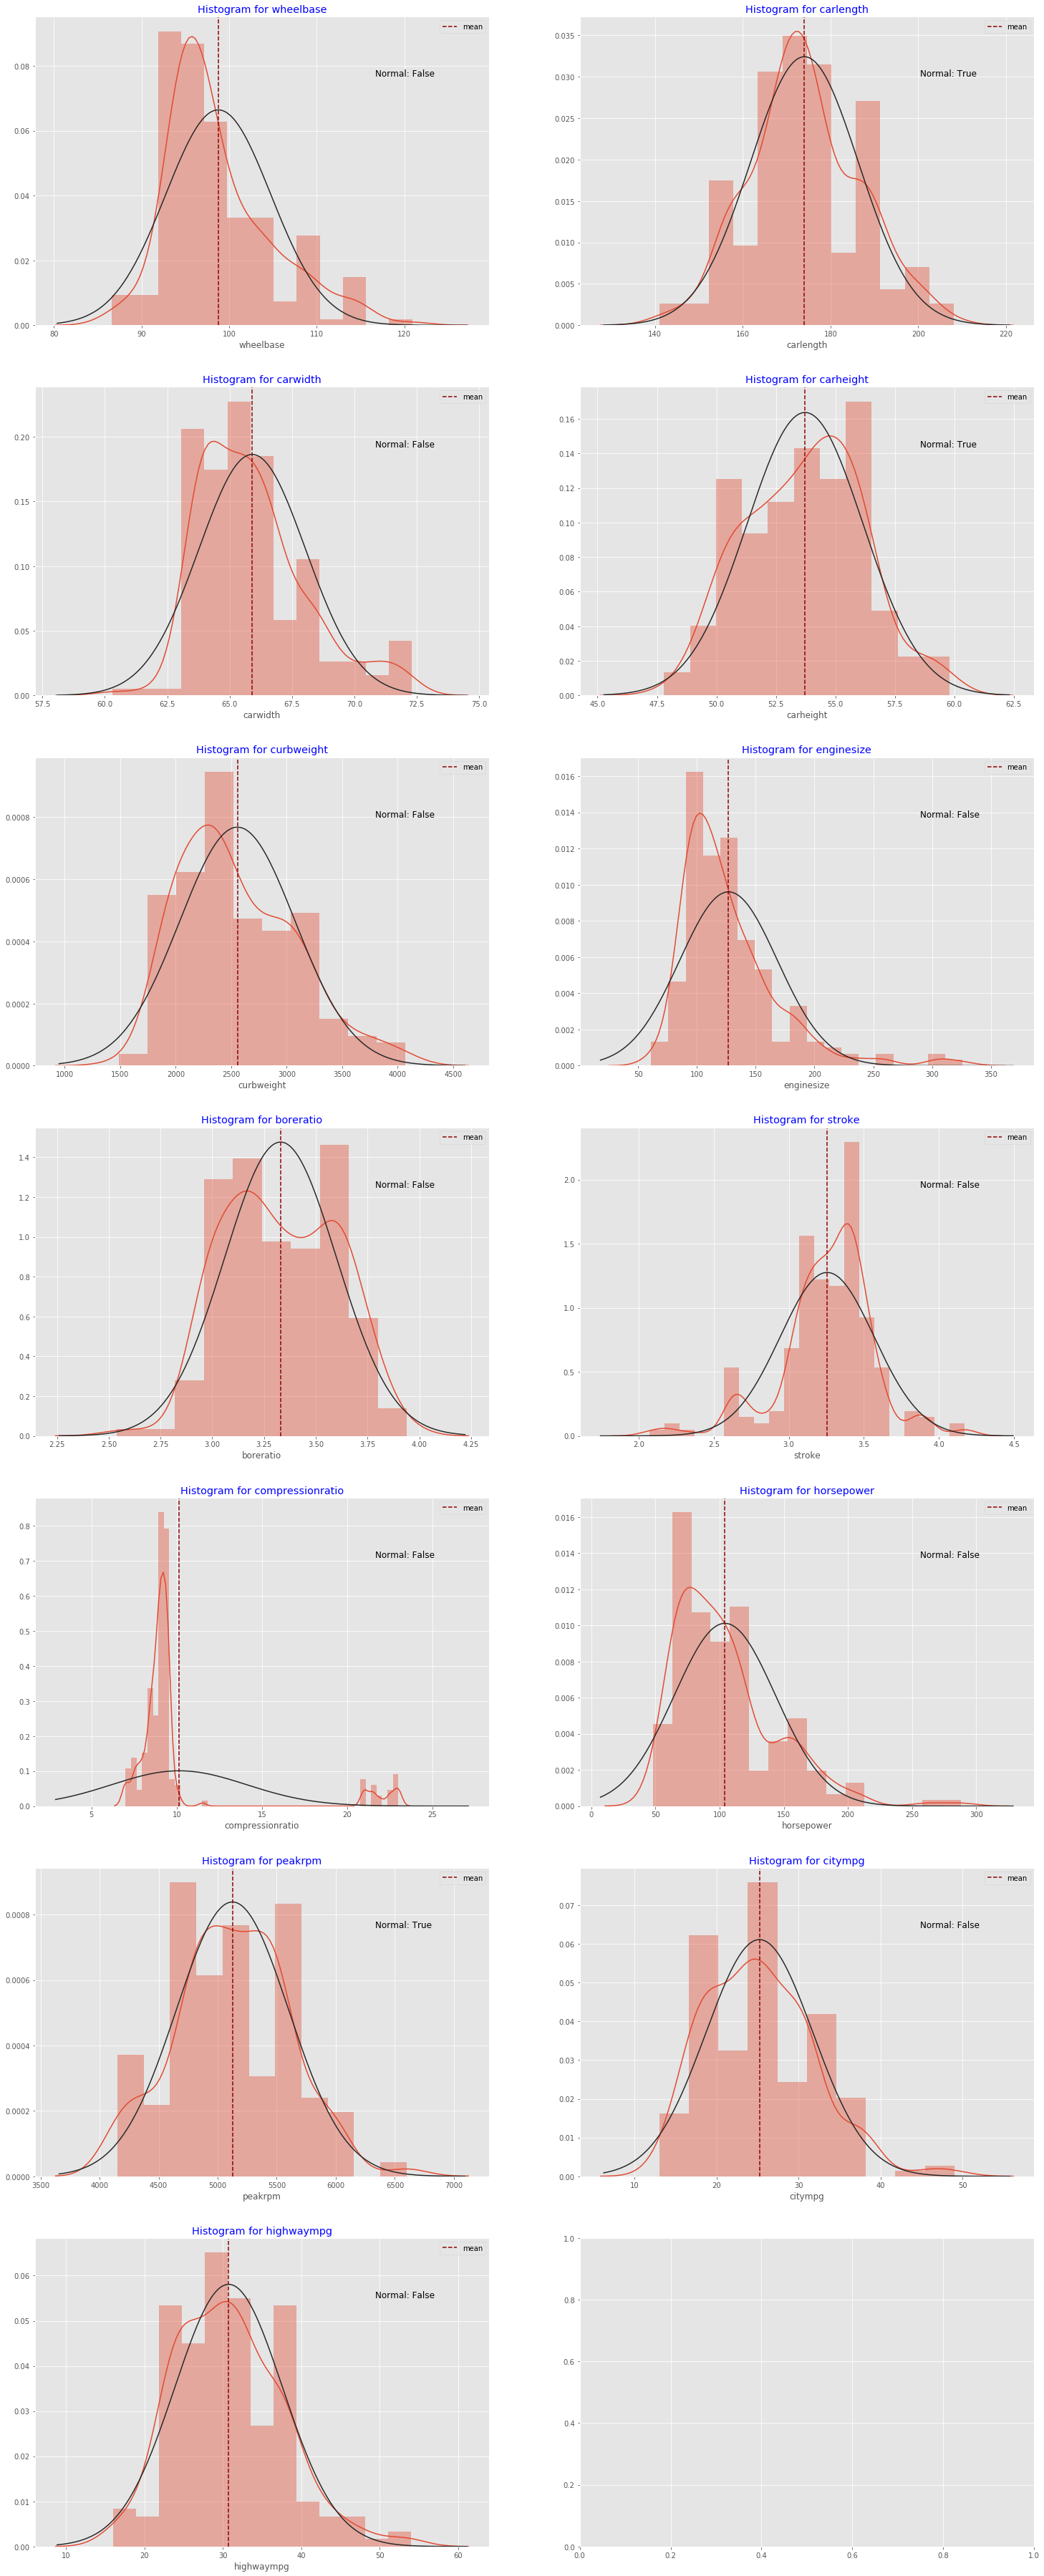

In [185]:
# num_features = numeric_features.copy()
# num_features.add('price')
subplot_histograms(carprice_df, numeric_features, cols = 2)

## Observations from above plot
- carwidth, carlength, peakrpm follow normal distribution
- rest all features do not follow normal distribution
- We will apply MinMaxScalar for all these numerical columns since for most of the columns the distribution is not normal

# 6.2 Visualize categorical columns<a id='Visualise Categorical Columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## A. Univariate and Bivariate analysis

## Common function to plot boxplot and fequency plot of categorical columns

In [186]:
#do the pairplot of selected features
def boxplot_features(df,categorical_features,target):
    features_count = len(categorical_features)
    if features_count%2 == 0:
        nrows=features_count//2
    else:
        nrows=features_count//2 + 1
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, features_count*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i in range(features_count):
        ax[i].set_title("Boxplot for {}".format(categorical_features[i]),color='blue')
        ax[i].set_xlabel(categorical_features[i]) 
        sns.boxplot(data=df, x = categorical_features[i],y = target,ax=ax[i])
    plt.show();

In [187]:
def boxplot_countplot_features(df,feature,target,another_row=False):
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(25,30))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    
    ## plot the countplot
    ax1.set_title("Frequency plot for {}".format(feature),color='blue')
    ax1.set_xlabel(feature)
    sns.countplot(x=feature,data=df,ax=ax1);
    
    ## plot the boxplot
    ax2.set_title("Boxplot for {}".format(feature),color='blue')
    ax2.set_xlabel(feature) 
    sns.boxplot(data=df, x = feature,y = target,ax=ax2)
    

In [188]:
#list of all categorical features
categorical_features = list(carprice_df.select_dtypes(include=np.object))
categorical_features.remove('company')#will plot company separately
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## 1. Lets plot frequency of different types of symboling and car price range for symboling

In [189]:
carprice_df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [190]:
round(carprice_df.groupby('symboling')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                          \
          count      mean      std      min      25%      50%       75%   
symboling                                                                 
-2          3.0  15781.67  2745.65  12940.0  14462.5  15985.0  17202.50   
-1         22.0  17330.68  7640.56   8921.0  10748.0  16132.5  22223.75   
 0         67.0  14366.97  8752.40   6575.0   8426.5  11259.0  16912.50   
 1         54.0  10037.91  7283.04   5195.0   6559.0   7554.0   9188.38   
 2         32.0  10109.28  3886.13   5118.0   7465.5   8995.0  11704.25   
 3         27.0  17221.30  8027.99   8499.0  12239.5  14869.0  17674.50   

                                                
                85%      90%     100%      max  
symboling                                       
-2         17689.50  17933.0  18420.0  18420.0  
-1         25112.95  27978.4  34184.0  34184.0  
 0         18606.60  29209.6  41315.0  41315.0  
 1         16500.15  18192.3  45400.0  45400.0  
 2         15341.00  16338.0  18620.0  18620.0  
 3         23069.00  33128.0  37028.0  37028.0

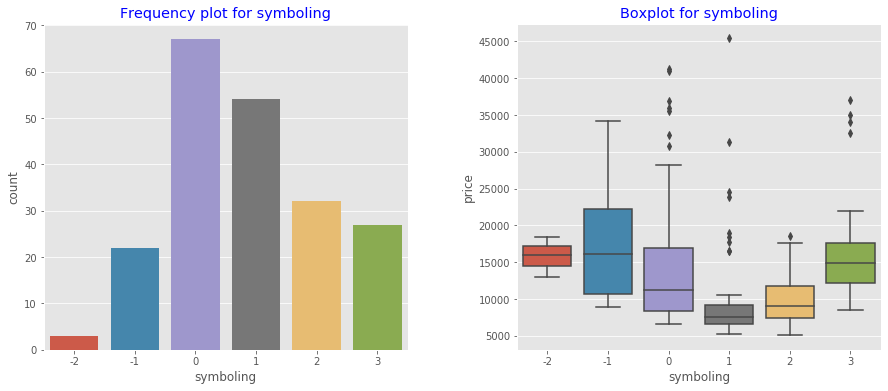

In [191]:
boxplot_countplot_features(carprice_df,'symboling','price')

## Observations from above plot
- The total number of observations for symboling as '0' (67) is the highest followed by type 1 (54), type 2 (32), type 3 (27), type -1 (22), type -2 (3)
- This means that people with risk as neutral buy more number of cars followed by low(1), medium(2) and high(3) risk
- Buying count of low risk cars (-1,-2) is very low
- cars with fueltype as 'gas' have many variance in price, there are many outliers within the range of [30000,45000]. The median price for feultype 'gas' is around 10500 while that for feultype 'diesel' is around 14000
- cars with symboling -1 have highest price around 35000, followed by symboling of 0. There are some outliers for symboling 0 and 1 with highest price of car around 45000 for symboling 1. For outliers, this means there are few cars with high price even though the insurance risk rating is neutral(0) or towards mid risk(1) or high risk (3). 
    - Please note that as per data dictionary, symboling is assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
- It can be seen that the price cars with risk level 2 is lowest (5118.0) followed by risk level 1 (5195.0) but the mean and median of risk level 1 is lowest (mean - 10037.91, median - 7554.0)

## 2. Lets plot frequency of different types of fuel and car price range for such fueltypes

In [192]:
carprice_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [193]:
round(carprice_df.groupby('fueltype')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                                \
          count      mean      std     min     25%      50%      75%      85%   
fueltype                                                                        
diesel     20.0  15838.15  7759.84  7099.0  9120.0  13852.5  19375.5  25945.6   
gas       185.0  12999.80  7984.41  5118.0  7689.0   9989.0  15998.0  18327.6   

                                     
              90%     100%      max  
fueltype                             
diesel    28183.2  31600.0  31600.0  
gas       21333.0  45400.0  45400.0

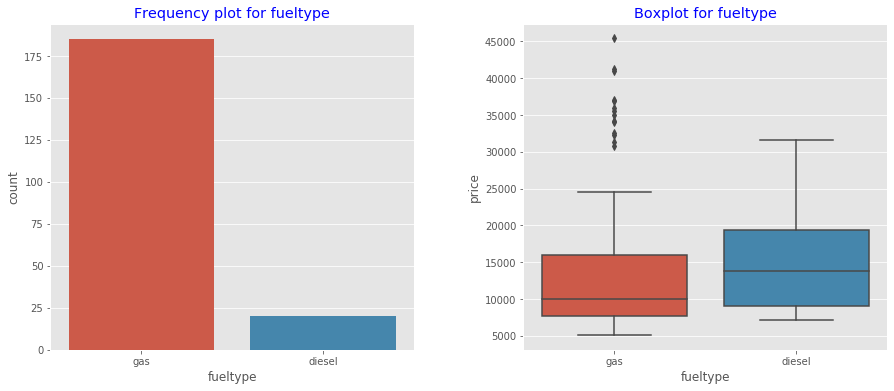

In [194]:
boxplot_countplot_features(carprice_df,'fueltype','price')

## Observations from above plot
- The total number of observations for fueltype as 'gas' (185) are more than feultype 'diesel' (20)
- car observation data points with fueltype as 'gas' have many variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for feultype 'diesel' (mean price - 15838.15, median price - 13852.5) is more than that of gas (mean price - 12999.80, median price - 9989.0)

## 3. Lets plot frequency of different aspiration types and car price range

In [195]:
carprice_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [196]:
round(carprice_df.groupby('aspiration')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min      25%      50%      75%   
aspiration                                                                
std         168.0  12611.27  8214.34  5118.0   7446.0   9418.0  15527.5   
turbo        37.0  16298.17  6098.89  7689.0  11694.0  16503.0  18950.0   

                                                 
                 85%      90%     100%      max  
aspiration                                       
std         17437.45  21219.0  45400.0  45400.0  
turbo       22563.00  24545.8  31600.0  31600.0

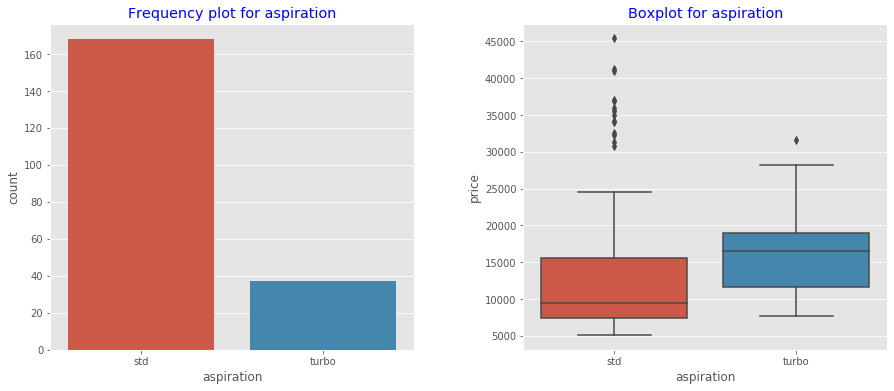

In [197]:
boxplot_countplot_features(carprice_df,'aspiration','price')

## Observations from above plot
- Mostly used aspiration in car is std (168) than aspiration turbo (37)
- cars with aspiration as 'std' have more variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for aspiration 'std' (mean price - 12611.27, median price - 9418.0) is lower than that for aspiration 'turbo' (mean price - 16298.17, median price - 16503.0)
- 85% of cars with aspiration as 'std' have price range within [5118.0, 17437.45]. Rest 15% are within the range of [17437.45, 45400.0]. Clearly there are outliers with 45400.0 being the highest price
- 85% of cars with aspiration as 'turbo' have price range within [7689.0, 22563.00]. Rest 15% are within the range of [22563.00, 31600.0]. There is an outliers with 31600.0 being the highest price
- Both cheapest price (5118.0) as well costliest price (45400.0) are for aspiration type 'std'

## 4. Lets plot frequency of different doornumber types and car price range

In [198]:
carprice_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [199]:
round(carprice_df.groupby('doornumber')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min     25%      50%       75%   
doornumber                                                                
four        115.0  13501.15  7338.30  6229.0  8006.0  10898.0  16872.50   
two          90.0  12989.92  8784.23  5118.0  7171.5   9927.0  15909.75   

                                                 
                 85%      90%     100%      max  
doornumber                                       
four        18890.00  22563.0  40960.0  40960.0  
two         18048.21  22633.8  45400.0  45400.0

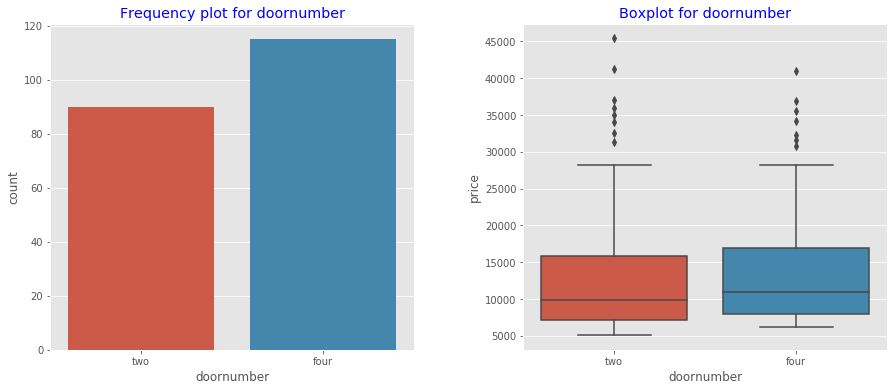

In [200]:
boxplot_countplot_features(carprice_df,'doornumber','price')

## Observations from above plot
- Mostly sold cars are with doornumber four (115) than doornumber two (90)
- cars with doornumber two have more variance in price, there are many outliers within the range of [30000,45000]. 
- The mean and median price for doornumber two is lower (mean price - 12989.92 and median price - 9927.0) than doornumber four (mean price - 13501.15, median price - 10898.0)
- 85% of cars with doornumber two have price range within [5118.0, 18048.21]. Rest 15% are within the range of [18048.21, 45400.0]. Clearly there are outliers with 45400.0 being the highest price
- 85% of cars with doornumber four have price range within [6229.0, 18890.00]. Rest 15% are within the range of [18890.00, 40960.0]. There are outliers with 40960.0 being the highest price
- Both cheapest price (5118.0) as well costliest price (45400.0) are for car with doornumber four

## 5. Lets plot frequency of different carbody types and car price range

In [201]:
carprice_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [202]:
round(carprice_df.groupby('carbody')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                            \
            count      mean       std      min       25%      50%       75%   
carbody                                                                       
convertible   6.0  21890.50  11187.80  11595.0  14246.25  17084.5  30709.25   
hardtop       8.0  22208.50  14555.52   8249.0   9341.50  19687.5  32903.00   
hatchback    70.0  10376.65   4909.64   5118.0   6564.00   8897.0  12730.25   
sedan        96.0  14344.27   8470.49   5499.0   8042.25  10846.5  17770.00   
wagon        25.0  12371.96   5120.95   6918.0   8013.00  11694.0  15750.00   

                                                  
                  85%      90%     100%      max  
carbody                                           
convertible  35549.00  36042.0  37028.0  37028.0  
hardtop      33953.00  37439.6  45400.0  45400.0  
hatchback    15874.45  16622.1  31400.5  31400.5  
sedan        21390.00  25058.5  41315.0  41315.0  
wagon        16847.00  18182.0  28248.0  28248.0

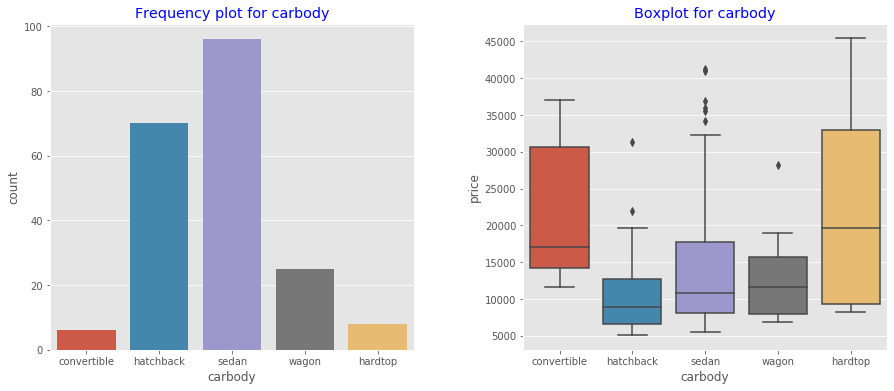

In [203]:
boxplot_countplot_features(carprice_df,'carbody','price')

## Observations from above plot
- Mostly sold cars are with carbody sedan (96), followed by hatchback (70), wagon (25), hardtop (8), convertible (6)
- cars with carbody hardtop have more variance in price
- The mean and median price for carbody hatchback is lowest (mean price - 10376.65 and median price - 8897.0)
- Carbody hardtop has the highest mean and median price  (mean price - 22208.50, median price - 19687.5) followed by convertible (mean price - 21890.50, median price - 17084.5)
- For cars with carbody hatchback, 85% of car price is within the the range [5118.0, 15874.45]. Rest 15% are within the range of [15874.45, 31400.5]. Clearly there are outliers with maximum price of 31400.5
- car price for carbody sedan also has many outliers. 85% of cars are within the range of [5499.0, 21390.00	]. Rest 15% are within the range of [21390.00, 41315.0] with 41315.0 being the highest price for carbody sedan

## 6. Lets plot frequency of different drivewheel types and car price range

In [204]:
carprice_df['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [205]:
round(carprice_df.groupby('drivewheel')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                        \
            count      mean      std     min      25%      50%      75%   
drivewheel                                                                
fwd         129.0   9368.25  3384.13  5118.0   7099.0   8358.0  10595.0   
rwd          76.0  19910.81  9120.14  6785.0  13475.0  16912.5  23110.0   

                                                
                85%      90%     100%      max  
drivewheel                                      
fwd         12881.8  14039.8  23875.0  23875.0  
rwd         32087.5  34620.0  45400.0  45400.0

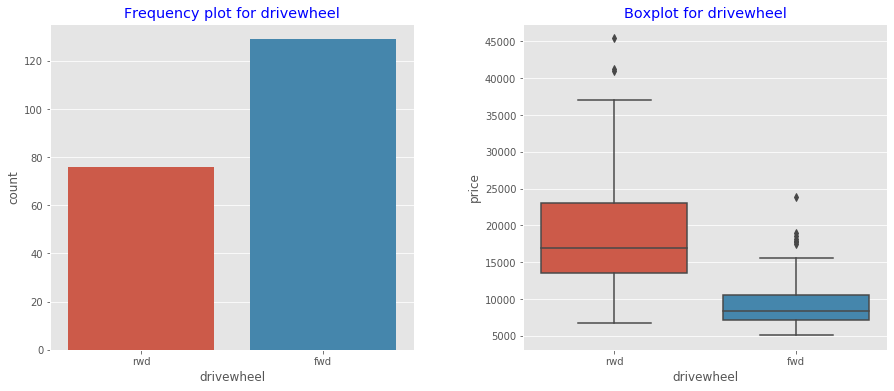

In [206]:
boxplot_countplot_features(carprice_df,'drivewheel','price')

## Observations from above plot
- Mostly sold cars are with drivewheel fwd (129), followed by rwd (76)
- cars with drivewheel rwd have more variance in price
- The mean and median price for drivewheel fwd is lowest (mean price - 9368.25 and median price - 8358.0)
- drivewheel fwd mean and median price as (mean price - 19910.81, median price - 16912.5) 
- maximum car price is for the car with drivewheel rwd
- 85% of car price for cars with drivewheel fwd is within the the range [5118.0, 12881.8]. Rest 15% are within the range of [12881.8, 23875.0]. Clearly there are outliers with maximum price of 23875.0
- car price for cars with drivewheel rwd also has few outliers. 85% of cars are within the range of [6785.0, 32087.5]. Rest 15% are within the range of [32087.5, 45400.0] with 45400.0 being the highest price

## 7. Lets plot frequency of different enginelocation types and car price range

In [207]:
carprice_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [208]:
round(carprice_df.groupby('enginelocation')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                         \
                count     mean      std      min       25%      50%      75%   
enginelocation                                                                 
front           202.0  12961.1  7607.98   5118.0   7778.25  10221.5  16482.5   
rear              3.0  34528.0  2291.29  32528.0  33278.00  34028.0  35528.0   

                                                    
                    85%      90%     100%      max  
enginelocation                                      
front           18334.4  21447.0  45400.0  45400.0  
rear            36128.0  36428.0  37028.0  37028.0

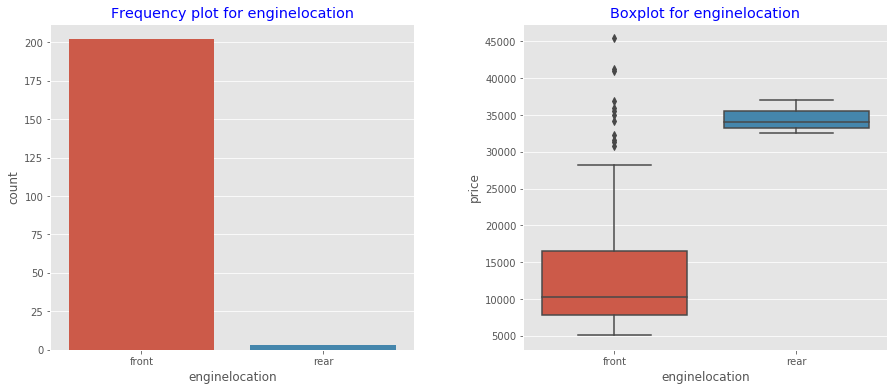

In [209]:
boxplot_countplot_features(carprice_df,'enginelocation','price')

## Observations from above plot
- Mostly sold cars are with enginelocation in front (202), followed by rear (3)
- cars with enginelocation front have more variance in price
- The mean and median price for enginelocation front is lowest (mean price - 12961.1 and median price - 10221.5) compared to enginelocation rear (mean price - 34528.0, median price - 34028.0) 
- maximum car price is for the car with enginelocation front
- 85% of car price for cars with enginelocation front is within the the range [5118.0, 18334.4]. Rest 15% are within the range of [18334.4, 45400.0]. Clearly there are outliers with maximum price of 45400.0
- 85% car price for cars with enginelocation rear within the range of [32528.0, 36128.0]. Rest 15% are within the range of [36128.0, 37028.0] with 37028.0 being the highest price. 

## 8. Lets plot frequency of different enginetype types and car price range

In [210]:
carprice_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [211]:
round(carprice_df.groupby('enginetype')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                            \
            count      mean       std      min       25%      50%       75%   
enginetype                                                                    
dohc         12.0  18116.42   7963.96   9298.0  15141.25  16249.0  18267.50   
dohcv         1.0  31400.50       NaN  31400.5  31400.50  31400.5  31400.50   
l            12.0  14627.58   3673.60   5151.0  13010.00  16105.0  16943.75   
ohc         148.0  11574.05   6407.83   5195.0   7383.50   9022.0  13522.50   
ohcf         15.0  13738.60  10930.48   5118.0   7533.00   9233.0  11476.50   
ohcv         13.0  25098.38  11442.93  13499.0  16500.00  19699.0  35056.00   
rotor         4.0  13020.00   2079.06  10945.0  11620.00  12745.0  14145.00   

                                                 
                 85%      90%     100%      max  
enginetype                                       
dohc        23390.50  30887.0  35550.0  35550.0  
dohcv       31400.50  31400.5  31400.5  31400.5  
l           17381.25  17862.5  18150.0  18150.0  
ohc         17658.05  18978.5  41315.0  41315.0  
ohcf        30444.60  33428.0  37028.0  37028.0  
ohcv        36992.00  39968.0  45400.0  45400.0  
rotor       14745.00  15045.0  15645.0  15645.0

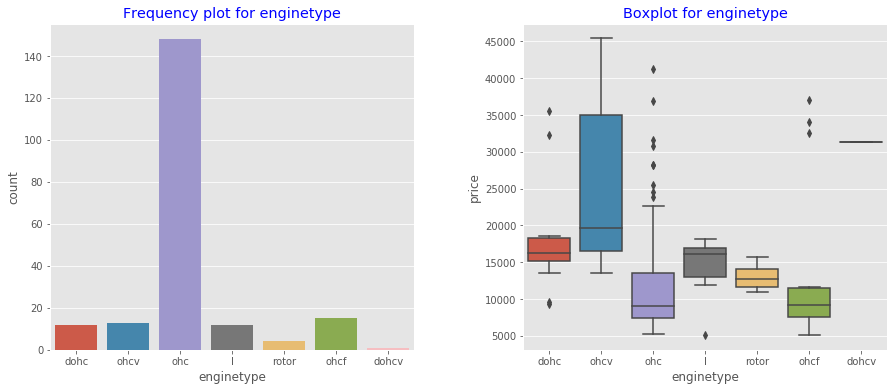

In [212]:
boxplot_countplot_features(carprice_df,'enginetype','price')

## Observations from above plot
- Mostly sold cars are with enginetype ohc (148), followed by ohcf (15), ohcv (13), l(12), dohc (12), rotor (4), dohcv (1 only)
- cars with enginetype ohcv have more variance in price
- The mean and median price for enginetype ohc is lowest (mean price - 11574.05 and median price - 9022.0) compared to enginetype dhcv is highest (mean price - 31400.50, median price - 31400.5) 
- maximum car price is for the car with enginetype ohcv 45400.0

## 9. Lets plot frequency of different types of cylindernumber and car price range 

In [213]:
carprice_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [214]:
round(carprice_df.groupby('cylindernumber')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                         \
                count      mean      std      min      25%      50%      75%   
cylindernumber                                                                 
eight             5.0  37400.10  5667.99  31400.5  34184.0  35056.0  40960.0   
five             11.0  21630.47  6091.39  13295.0  17580.0  18920.0  26864.0   
four            159.0  10285.75  3921.61   5118.0   7372.0   8948.0  12365.0   
six              24.0  23671.83  8850.14  13499.0  16374.5  21037.5  32319.5   
three             1.0   5151.00      NaN   5151.0   5151.0   5151.0   5151.0   
twelve            1.0  36000.00      NaN  36000.0  36000.0  36000.0  36000.0   
two               4.0  13020.00  2079.06  10945.0  11620.0  12745.0  14145.0   

                                                    
                    85%      90%     100%      max  
cylindernumber                                      
eight           42736.0  43624.0  45400.0  45400.0  
five            28212.0  28248.0  31600.0  31600.0  
four            15531.0  16725.0  22625.0  22625.0  
six             34865.1  36481.0  41315.0  41315.0  
three            5151.0   5151.0   5151.0   5151.0  
twelve          36000.0  36000.0  36000.0  36000.0  
two             14745.0  15045.0  15645.0  15645.0

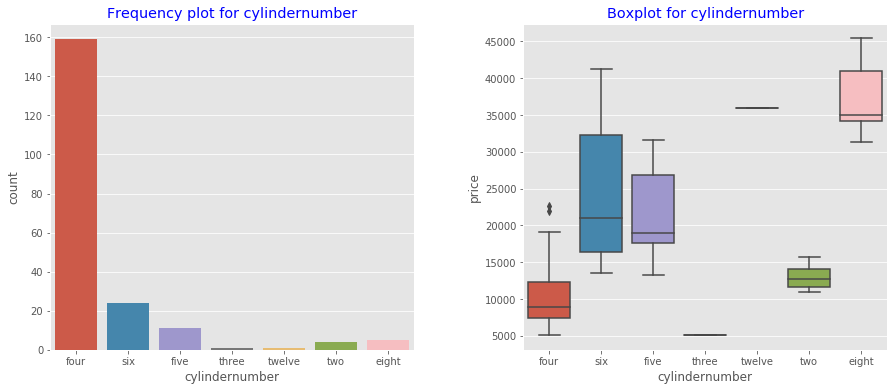

In [215]:
boxplot_countplot_features(carprice_df,'cylindernumber','price')

## Observations from above plot
- Mostly sold cars are for cylindernumber as four (159) is the highest followed by type six (24), type five (11), type eight (5), type two (4), type three (1) and type twelve (1)
- cars with cylindernumber as six have high variance in price 
- The mean and median car price for cylindernumber three is lowest (mean price - 5151.00, median price - 5151.0)
- The car price is highest for the cylindernumber eight (45400.0) and its the lowest for cylindernumber four (5118.0)	

## 10. Lets plot frequency of different fuelsystem and car price range

In [216]:
carprice_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [217]:
round(carprice_df.groupby('fuelsystem')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                           \
           count      mean      std      min       25%      50%       75%   
fuelsystem                                                                  
1bbl        11.0   7555.55  1390.12   5399.0   6692.00   7295.0   8370.00   
2bbl        66.0   7478.15  1385.36   5118.0   6593.50   7372.0   8330.75   
4bbl         3.0  12145.00  1374.77  10945.0  11395.00  11845.0  12745.00   
idi         20.0  15838.15  7759.84   7099.0   9120.00  13852.5  19375.50   
mfi          1.0  12964.00      NaN  12964.0  12964.00  12964.0  12964.00   
mpfi        94.0  17754.60  8685.89   7957.0  11619.75  15991.5  18942.50   
spdi         9.0  10990.44  2741.73   7689.0   9279.00   9959.0  12764.00   
spfi         1.0  11048.00      NaN  11048.0  11048.00  11048.0  11048.00   

                                                 
                 85%      90%     100%      max  
fuelsystem                                       
1bbl         8970.00   9095.0  10295.0  10295.0  
2bbl         8917.62   9091.0  11245.0  11245.0  
4bbl        13105.00  13285.0  13645.0  13645.0  
idi         25945.60  28183.2  31600.0  31600.0  
mfi         12964.00  12964.0  12964.0  12964.0  
mpfi        24874.75  33578.0  45400.0  45400.0  
spdi        14144.00  14565.0  14869.0  14869.0  
spfi        11048.00  11048.0  11048.0  11048.0

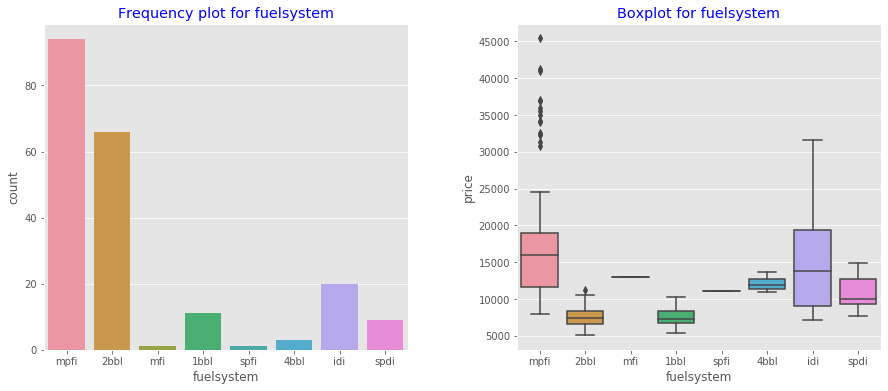

In [218]:
boxplot_countplot_features(carprice_df,'fuelsystem','price')

## Observations from above plot
- Mostly sold cars are for fuelsystem mpfi (94), followed by 2bbl (66), idi (20), 1bbl (11), spdi (9), 4bbl (3), mfi (1), spfi (1)
- cars with fuelsystem as mpfi have high variance in price, there are many outliers within the range of [24874.75,45400.0]. 
- The median price for fuelsystem 2bbl is the lowest (7478.15) while the median price of 1bbl is the lowest (7295.0)

## 11. Lets plot frequency of different company and car price range

In [219]:
carprice_df['company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: company, dtype: int64

In [220]:
round(carprice_df.groupby('company')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                           \
            count      mean      std      min       25%      50%       75%   
company                                                                      
alfa-romero   3.0  15498.33  1734.94  13495.0  14997.50  16500.0  16500.00   
audi          7.0  17859.17  3151.58  13950.0  16350.00  17710.0  18389.58   
bmw           8.0  26118.75  9263.83  16430.0  19958.75  22835.0  32290.00   
buick         8.0  33647.00  6789.56  25552.0  28230.00  32892.0  36532.00   
chevrolet     3.0   6007.00   754.42   5151.0   5723.00   6295.0   6435.00   
dodge         9.0   7875.44  2213.39   5572.0   6377.00   7609.0   8558.00   
honda        13.0   8184.69  2061.67   5399.0   6855.00   7295.0   9095.00   
isuzu         4.0   8916.50  1740.36   6785.0   8383.62   8916.5   9449.38   
jaguar        3.0  34600.00  2047.56  32250.0  33900.00  35550.0  35775.00   
mazda        17.0  10652.88  3975.68   5195.0   7395.00  10595.0  11845.00   
mercury       1.0  16503.00      NaN  16503.0  16503.00  16503.0  16503.00   
mitsubishi   13.0   9239.77  3043.00   5389.0   6989.00   8499.0   9959.00   
nissan       18.0  10415.67  4477.39   5499.0   7311.50   8124.0  13499.00   
peugeot      11.0  15489.09  2246.75  11900.0  13530.00  16630.0  16987.50   
plymouth      7.0   7963.43  2395.54   5572.0   6460.50   7609.0   8439.00   
porsche       5.0  31400.50  5654.09  22018.0  31400.50  32528.0  34028.00   
renault       2.0   9595.00   424.26   9295.0   9445.00   9595.0   9745.00   
saab          6.0  15223.33  2860.79  11850.0  12887.50  15275.0  17490.00   
subaru       12.0   8541.25  1940.19   5118.0   7378.75   7894.0  10019.50   
toyota       32.0   9885.81  3204.98   5348.0   7870.50   9103.0  10973.25   
volkswagen   12.0  10077.50  2178.55   7775.0   8145.00   9737.5  11768.75   
volvo        11.0  18063.18  3314.65  12940.0  16250.00  18420.0  20265.00   

                                                   
                  85%       90%     100%      max  
company                                            
alfa-romero  16500.00  16500.00  16500.0  16500.0  
audi         19415.50  20902.00  23875.0  23875.0  
bmw          36574.00  38210.50  41315.0  41315.0  
buick        40664.80  42292.00  45400.0  45400.0  
chevrolet     6491.00   6519.00   6575.0   6575.0  
dodge         8848.40   9729.60  12964.0  12964.0  
honda        10305.00  10335.00  12945.0  12945.0  
isuzu        10088.82  10408.55  11048.0  11048.0  
jaguar       35865.00  35910.00  36000.0  36000.0  
mazda        14845.00  16699.00  18344.0  18344.0  
mercury      16503.00  16503.00  16503.0  16503.0  
mitsubishi   13001.00  14117.00  14869.0  14869.0  
nissan       15659.00  17559.00  19699.0  19699.0  
peugeot      17512.50  17950.00  18150.0  18150.0  
plymouth      9305.30  10458.20  12764.0  12764.0  
porsche      35228.00  35828.00  37028.0  37028.0  
renault       9805.00   9835.00   9895.0   9895.0  
saab         18267.50  18385.00  18620.0  18620.0  
subaru       10569.35  11152.90  11694.0  11694.0  
toyota       12998.35  15744.00  17669.0  17669.0  
volkswagen   12641.75  13194.50  13845.0  13845.0  
volvo        21977.50  22470.00  22625.0  22625.0

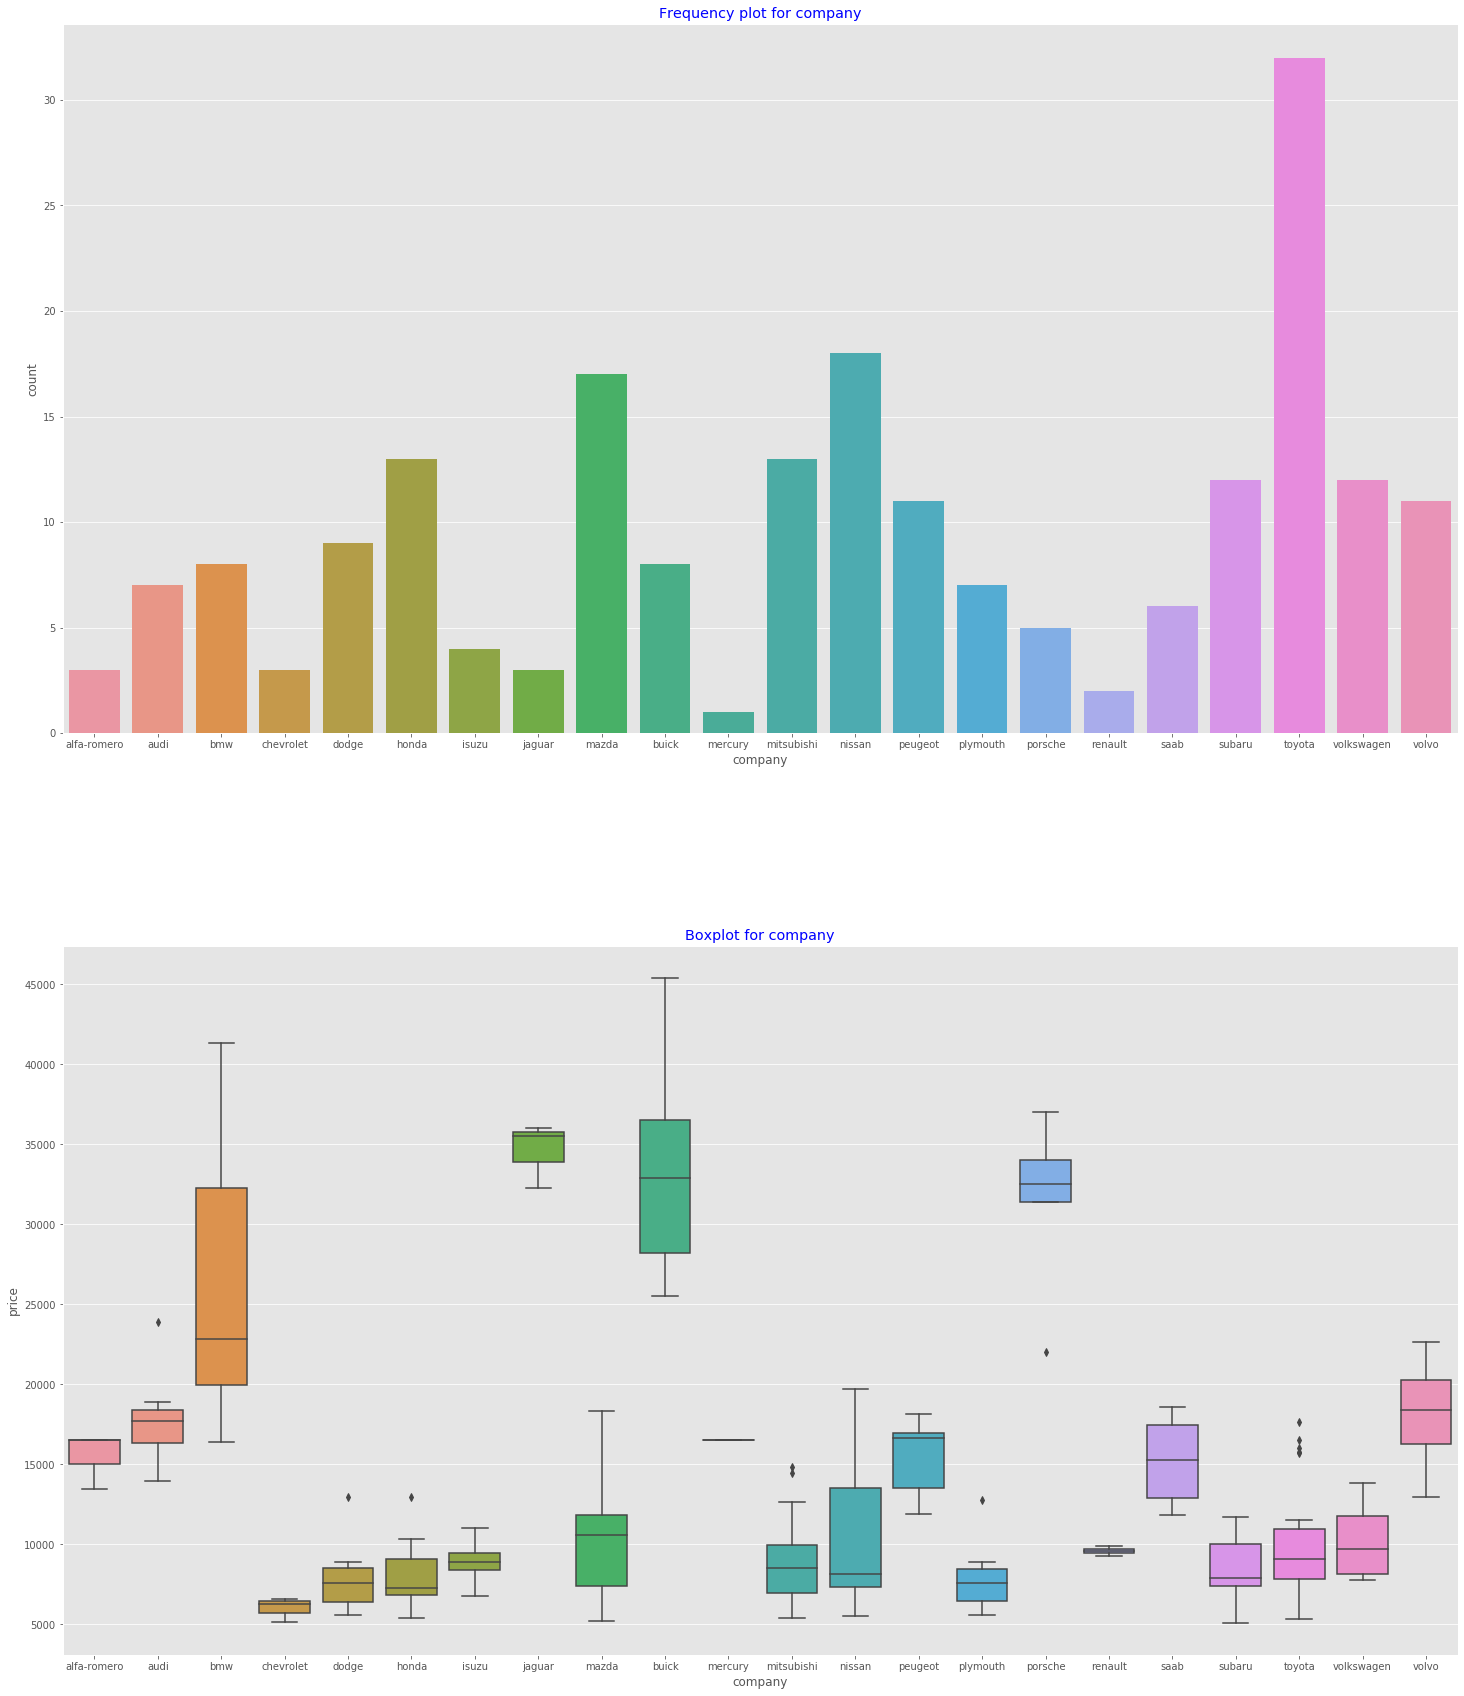

In [221]:
boxplot_countplot_features(carprice_df,'company','price',True)

## Observations from above plot
- Mostly sold cars are for company toyota toyota(32), followed by nissan(18), mazda(17),honda(13), mitsubishi(13), volkswagen(12), subaru(12), peugeot(11), volvo(11) and others
- cars of company bmw have high variance in price
- The mean and median car price of company chevrolet is the lowest (mean price - 6007.00, median price - 6295.0)
- The mean and median car price of company jaguar is the highest (mean price - 34600.00, median price - 35550.0)
- The maximum price car is for company buick (45400.0)

# 7. Feature Engineering<a id='Feature Engineering'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

From above observations we can see that company has many values - 22 in total. If we will use dummy variables it will result is sparse matrix so we need to do so some feature engineering on this column wrt target variable
- We can group the cars based on company and can bin the amount in various bins as below
    - [0,15000,25000,4000] as low, mid, high range cars

In [222]:
bins = [0,10000,20000,50000] 
carlabels = ['low', 'mid', 'high']
carprice_df['carrange'] = pd.cut(carprice_df['price'], bins=bins, labels=carlabels,right=False)
carprice_df.head(10)

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company,carrange
0,13495.000,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,mid
1,16500.000,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero,mid
2,16500.000,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero,mid
3,13950.000,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi,mid
4,17450.000,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi,mid
5,15250.000,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,audi,mid
6,17710.000,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,audi,mid
7,18920.000,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,audi,mid
8,23875.000,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,audi,high
9,17859.167,0,gas,turbo,two,hatchback,fwd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,audi,mid


In [223]:
carprice_df[carprice_df['price']==45400.0]

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company,carrange
74,45400.0,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.8,3.35,8.0,184,4500,14,16,buick,high


## Lets visualise car range and car price

In [224]:
carprice_df['carrange'].value_counts()

low     100
mid      79
high     26
Name: carrange, dtype: int64

In [225]:
round(carprice_df.groupby('carrange')[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                          \
          count      mean      std      min      25%       50%      75%   
carrange                                                                  
low       100.0   7723.11  1299.56   5118.0   6762.5   7775.00   8845.0   
mid        79.0  14599.82  2765.46  10198.0  12035.0  14489.00  16872.5   
high       26.0  30616.48  6974.27  20970.0  24047.5  31500.25  35426.5   

                                               
               85%      90%     100%      max  
carrange                                       
low        9261.15   9499.3   9995.0   9995.0  
mid       17886.42  18292.8  19699.0  19699.0  
high      36917.00  38994.0  45400.0  45400.0

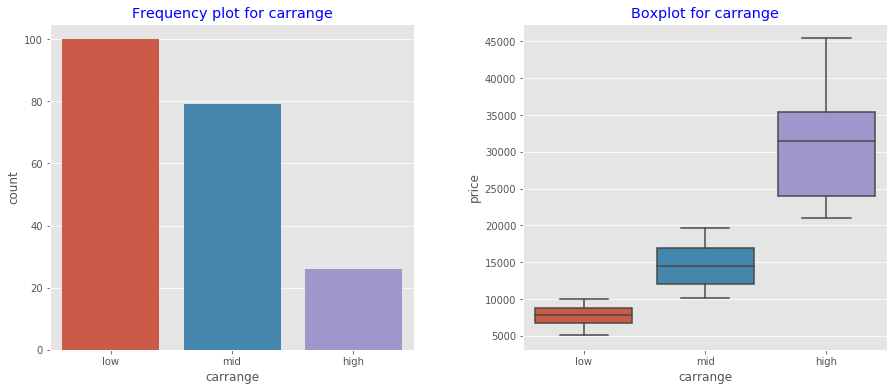

In [226]:
boxplot_countplot_features(carprice_df,'carrange','price')

## Observations from above plot
- Mostly sold cars are of low range(100), followed by mid(79), low(26)
- high end cars have high variance in price
- The mean and median car price of low end cars is the lowest (mean price - 5118.0, median price - 7775.00)
- The mean and median car price of high end cars is the highest (mean price - 30616.48, median price - 31500.25)
- The maximum price car is for high end car is (45400.0)

In [227]:
round(carprice_df.groupby('carrange')['price'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

,count,mean,std,min,25%,50%,75%,85%,90%,100%,max
carrange,,,,,,,,,,,
low,100.0,7723.11,1299.56,5118.0,6762.5,7775.00,8845.0,9261.15,9499.3,9995.0,9995.0
mid,79.0,14599.82,2765.46,10198.0,12035.0,14489.00,16872.5,17886.42,18292.8,19699.0,19699.0
high,26.0,30616.48,6974.27,20970.0,24047.5,31500.25,35426.5,36917.00,38994.0,45400.0,45400.0


In [228]:
round(carprice_df.groupby(['company','carrange'])[['price']].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]),2)

price                                                 \
                     count      mean      std      min       25%      50%   
company     carrange                                                        
alfa-romero mid        3.0  15498.33  1734.94  13495.0  14997.50  16500.0   
audi        mid        6.0  16856.53  1864.01  13950.0  15800.00  17580.0   
            high       1.0  23875.00      NaN  23875.0  23875.00  23875.0   
bmw         mid        2.0  16677.50   350.02  16430.0  16553.75  16677.5   
            high       6.0  29265.83  8519.49  20970.0  21970.00  27662.5   
buick       high       8.0  33647.00  6789.56  25552.0  28230.00  32892.0   
chevrolet   low        3.0   6007.00   754.42   5151.0   5723.00   6295.0   
dodge       low        8.0   7239.38  1198.96   5572.0   6340.00   7150.5   
            mid        1.0  12964.00      NaN  12964.0  12964.00  12964.0   
honda       low       10.0   7281.60  1109.02   5399.0   6610.50   7212.0   
            mid        3.0  11195.00  1515.75  10295.0  10320.00  10345.0   
isuzu       low        3.0   8206.00  1230.62   6785.0   7850.75   8916.5   
            mid        1.0  11048.00      NaN  11048.0  11048.00  11048.0   
jaguar      high       3.0  34600.00  2047.56  32250.0  33900.00  35550.0   
mazda       low        7.0   7073.57  1289.01   5195.0   6395.00   6795.0   
            mid       10.0  13158.40  3170.54  10245.0  10832.50  11545.0   
mercury     mid        1.0  16503.00      NaN  16503.0  16503.00  16503.0   
mitsubishi  low       10.0   7813.00  1491.90   5389.0   6749.00   7939.0   
            mid        3.0  13995.67  1198.72  12629.0  13559.00  14489.0   
nissan      low       12.0   7565.67  1066.93   5499.0   7036.50   7424.0   
            mid        6.0  16115.67  2678.37  13499.0  13724.00  15799.0   
peugeot     mid       11.0  15489.09  2246.75  11900.0  13530.00  16630.0   
plymouth    low        6.0   7163.33  1228.45   5572.0   6344.75   7150.5   
            mid        1.0  12764.00      NaN  12764.0  12764.00  12764.0   
porsche     high       5.0  31400.50  5654.09  22018.0  31400.50  32528.0   
renault     low        2.0   9595.00   424.26   9295.0   9445.00   9595.0   
saab        mid        6.0  15223.33  2860.79  11850.0  12887.50  15275.0   
subaru      low        9.0   7704.89  1371.20   5118.0   7126.00   7603.0   
            mid        3.0  11050.33   769.52  10198.0  10728.50  11259.0   
toyota      low       22.0   8140.41  1250.62   5348.0   7333.00   8148.0   
            mid       10.0  13725.70  2811.00  10698.0  11211.25  13619.5   
volkswagen  low        8.0   8738.12   934.36   7775.0   7990.00   8345.0   
            mid        4.0  12756.25  1006.90  11595.0  12116.25  12792.5   
volvo       mid        8.0  16514.38  2352.49  12940.0  15342.50  16680.0   
            high       3.0  22193.33   618.31  21485.0  21977.50  22470.0   

                                                                      
                           75%       85%       90%     100%      max  
company     carrange                                                  
alfa-romero mid       16500.00  16500.00  16500.00  16500.0  16500.0  
audi        mid       17821.88  18124.38  18389.58  18920.0  18920.0  
            high      23875.00  23875.00  23875.00  23875.0  23875.0  
bmw         mid       16801.25  16850.75  16875.50  16925.0  16925.0  
            high      35350.00  37988.75  39097.50  41315.0  41315.0  
buick       high      36532.00  40664.80  42292.00  45400.0  45400.0  
chevrolet   low        6435.00   6491.00   6519.00   6575.0   6575.0  
dodge       low        8107.25   8527.95   8666.90   8921.0   8921.0  
            mid       12964.00  12964.00  12964.00  12964.0  12964.0  
honda       low        7745.00   8512.50   8870.00   9095.0   9095.0  
            mid       11645.00  12165.00  12425.00  12945.0  12945.0  
isuzu       low        8916.50   8916.50   8916.50   8916.5   8916.5  
            mid       11048.0

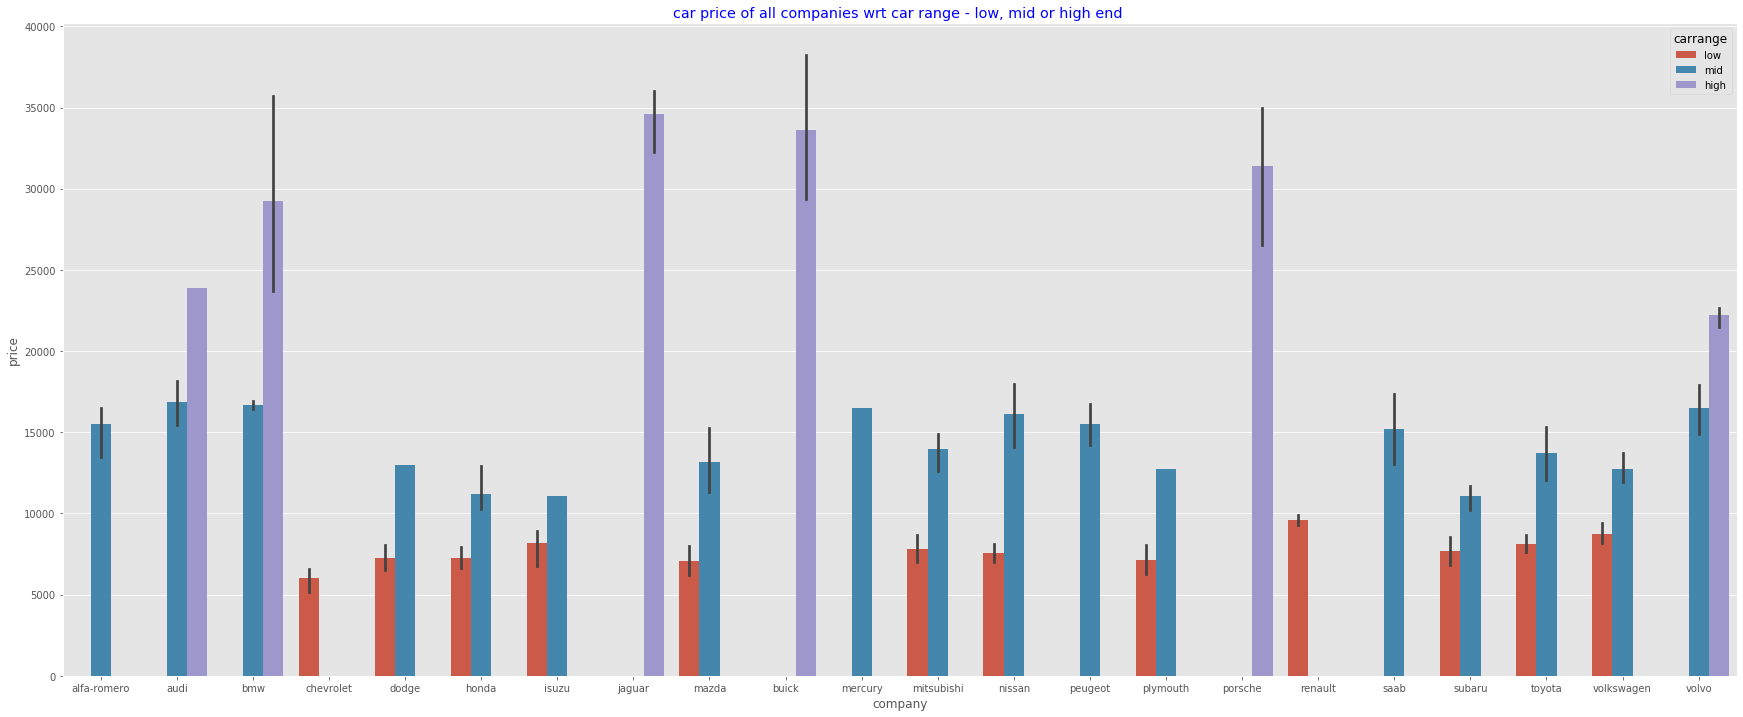

In [229]:
plt.figure(figsize=(30,12))
plt.title('car price of all companies wrt car range - low, mid or high end ',color='blue')
sns.barplot(y='price',x='company',hue='carrange',data=carprice_df);

## Observations from above plot
- companies - jauguar, buick, porche deal in only high end cars
    - for jaguar, car prices are - (average price - 34600.00, lowest price - 32250.0, highest price - 36000.0)
        -  There are 3 cars in market of brand jaguar
    - for buick, car prices are - (average price - 33647.00, lowest price - 25552.0, highest price - 45400.0)
        - There are 8 cars in market of brand buick
    - for porche car prices are - (average price - 31400.50, lowest price - 22018.0	, highest price - 37028.0)
        - There are 5 cars in market of brand porche
- the lowest price in high end range is 20970.0(company - bmw) and the highest price is 45400.0(company - buick)
- companies - alfa-romero, mercury, saab deal in only mid end cars
    - for alfa-romero, car prices are - (average price - 15498.33, lowest price - 13495.0, highest price - 16500.0)
        - There are 3 cars of alfa-romero brand
    - for mercury, car prices are - (average price - 16503.00, lowest price - 16503.00, highest price - 16503.00)
        - There is only 1 car of mercury brand
    - for saab car prices are - (average price - 15223.33, lowest price - 11850.0 , highest price - 18620.0)
        - There are 6 cars of saab brand
- the lowest price in mid end range is 10198.0 (company - subaru) and the highest price is 19699.0(company - nissan)
- companies - chevrolet, renault deal in only low end cars
    - for chevrolet, car prices are - (average price - 6007.00, lowest price - 5151.0, highest price - 6575.0)
        - There are 3 cars of chevrolet brand
    - for renault, car prices are - (average price - 9595.00, lowest price - 9295.0, highest price - 9895.0)
        - There are only 2 cars of renault brand
- the lowest price in low end range is 5118.0 (company - subaru) and the highest price is 9995.0(company - volkswagen)
- companies that deal in low-mid range are - dodge, honda, isuzu, mazda, mitsubishi, nissan, plymouth, subaru, toyota, volkswagen
- companies that deal in mid-high range are - audi, bmw, volvo

## Lets check correlation between citympg and highwaympg

In [230]:
carprice_df[['citympg','highwaympg']].corr()

,citympg,highwaympg
citympg,1.000000,0.971337
highwaympg,0.971337,1.000000


## Observation from above correlation table
- As we have seen there is high correlation between citympg and highwaympg
- Lets create a ratio of citympg and highwaympg defined by city_highway_ratio with formula citympg/highwaympg and drop original columns to have only one independent variable during model building

In [231]:
carprice_df['city_highway_ratio'] = carprice_df['citympg']/carprice_df['highwaympg']
carprice_df.drop(columns=['citympg','highwaympg'],inplace=True)
carprice_df.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,company,carrange,city_highway_ratio
0,13495.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,mid,0.777778
1,16500.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,alfa-romero,mid,0.777778
2,16500.0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,alfa-romero,mid,0.730769
3,13950.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,audi,mid,0.800000
4,17450.0,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,audi,mid,0.818182


# 8. Converting categorical columns to dummy variables<a id='Categorical To Dummy'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- Before converting categorical columns to dummy variables lets create new dataframe as copy of carprice_df.
- We will use this dataframe to further do the analysis

### We will convert dummies one-by-one instead of using for loop. This to cross-check data & avoid any issues

In [232]:
#copy carprice_df
carprice_new_df = carprice_df.copy()
#drop column company
carprice_new_df.drop(columns=['company'],inplace=True)
carprice_new_df.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio
0,13495.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778
1,16500.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778
2,16500.0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769
3,13950.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000
4,17450.0,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182


In [233]:
# converting symboling column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['symboling'],prefix='symboling',
                                       drop_first=True)
carprice_new_df.head()

,price,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,13495.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1
1,16500.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1
2,16500.0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0
3,13950.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0
4,17450.0,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0


In [234]:
# converting fueltype column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['fueltype'],prefix='fueltype',
                                       drop_first=True)
carprice_new_df.head()

,price,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas
0,13495.0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1
1,16500.0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1
2,16500.0,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1
3,13950.0,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1
4,17450.0,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1


In [235]:
# converting aspiration column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['aspiration'],prefix='aspiration',drop_first=True)
carprice_new_df.head()

,price,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo
0,13495.0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0
1,16500.0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0
2,16500.0,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0
3,13950.0,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0
4,17450.0,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0


In [236]:
# converting doornumber column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['doornumber'],prefix='doornumber',drop_first=True)
carprice_new_df.head()

,price,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two
0,13495.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1
1,16500.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1
2,16500.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1
3,13950.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0
4,17450.0,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0


In [237]:
# converting doornumber column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['carbody'],prefix='carbody',drop_first=True)
carprice_new_df.head()

,price,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,13495.0,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0
1,16500.0,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0
2,16500.0,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0
3,13950.0,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0
4,17450.0,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0


In [238]:
# converting doornumber column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['drivewheel'],prefix='drivewheel',drop_first=True)
carprice_new_df.head()

,price,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd
0,13495.0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1
1,16500.0,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1
2,16500.0,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1
3,13950.0,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0
4,17450.0,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0


In [239]:
# converting enginelocation column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['enginelocation'],prefix='enginelocation',
                                 drop_first=True)
carprice_new_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear
0,13495.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0
1,16500.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0
2,16500.0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1,0
3,13950.0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [240]:
# converting enginetype column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['enginetype'],prefix='enginetype',drop_first=True)
carprice_new_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,13495.0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,16500.0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,16500.0,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,13950.0,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [241]:
# converting cylindernumber column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['cylindernumber'],prefix='cylindernumber',
                                 drop_first=True)
carprice_new_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [242]:
# converting fuelsystem column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['fuelsystem'],prefix='fuelsystem',drop_first=True)
carprice_new_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,carrange,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,mid,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,mid,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,mid,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,mid,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [243]:
carprice_new_df.loc[:,carprice_new_df.columns.str.contains('fuelsystem')]['fuelsystem_mfi']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [244]:
# converting symboling column to dummy variable
carprice_new_df = pd.get_dummies(carprice_new_df,columns=['carrange'],prefix='carrange',drop_first=True)
carprice_new_df.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carrange_mid,carrange_high
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,0.777778,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,0.730769,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,0.800000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,0.818182,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [245]:
carprice_new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
price                    205 non-null float64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
city_highway_ratio       205 non-null float64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null uint8
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uin

# 9. Train - Test Split<a id='Train Test Split'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [246]:
features = [col for col in carprice_new_df if col!='price']
#features

In [247]:
df_train,df_test = train_test_split(carprice_new_df,random_state=42,train_size=0.7,test_size=0.3)
print('No. of rows: {0} and columns: {1} in df_train'.format(df_train.shape[0],df_train.shape[1]))
print('No. of rows: {0} and columns: {1} in df_test'.format(df_test.shape[0],df_test.shape[1]))

No. of rows: 143 and columns: 48 in df_train
No. of rows: 62 and columns: 48 in df_test


In [248]:
df_train.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carrange_mid,carrange_high
177,11248.0,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200,0.843750,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
75,16503.0,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,0.791667,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
174,10698.0,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500,0.909091,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
31,6855.0,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,0.815789,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,20970.0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,0.750000,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# 10. Feature Scaling<a id='Feature Scaling'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [249]:
# continuous numeric features
#numeric_features
numeric_features = list(carprice_df.select_dtypes(include=np.number))
numeric_features.remove('price')
numeric_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'city_highway_ratio']

In [250]:
#add price as well in the list
numeric_features.append('price')

## 10.1 Apply MinMaxScaler on all continuous numerical features<a id='Min Max Scalar'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [251]:
#sc = StandardScaler()
sc = MinMaxScaler()

#Fit and transform Train
df_train[numeric_features] = sc.fit_transform(df_train[numeric_features])

#Transform Test (No Fit)
df_test[numeric_features] = sc.transform(df_test[numeric_features])

In [252]:
df_train.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carrange_mid,carrange_high
177,0.152177,0.544828,0.534483,0.447619,0.508333,0.284379,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.602273,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
75,0.282632,0.555172,0.582759,0.590476,0.583333,0.485536,0.273438,0.885714,0.500000,0.06250,0.521186,0.346939,0.469697,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
174,0.138523,0.544828,0.534483,0.447619,0.591667,0.294170,0.156250,0.521429,0.609524,0.96875,0.088983,0.142857,0.768595,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
31,0.043121,0.000000,0.000000,0.200000,0.250000,0.000000,0.085938,0.264286,0.638095,0.13750,0.101695,0.755102,0.531100,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0.393526,0.503448,0.555172,0.285714,0.541667,0.396529,0.367188,0.550000,0.533333,0.12500,0.292373,0.040816,0.363636,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# 11. Divide into X and Y for model building<a id='Divide into X and Y'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [253]:
## X_train and y_train
y_train_scaled = df_train[['price']]
X_train_scaled = df_train[features]

## X_test and y_test
y_test_scaled = df_test[['price']]
X_test_scaled = df_test[features]
y_train_scaled.head()

,price
177,0.152177
75,0.282632
174,0.138523
31,0.043121
12,0.393526


# 12. Check for heatmap<a id='Heatmap'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [254]:
def carprice_heatmap(df):
    plt.figure(figsize=(60,30))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        sns.heatmap(df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                    annot_kws={"size":9},cmap='YlGnBu');
    plt.title('Heatmap of Car Price Dataset', fontsize = 20,color='blue') # title with fontsize 20
    plt.xlabel('Features', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Features', fontsize = 15) # y-axis label with fontsize 15

    plt.show()

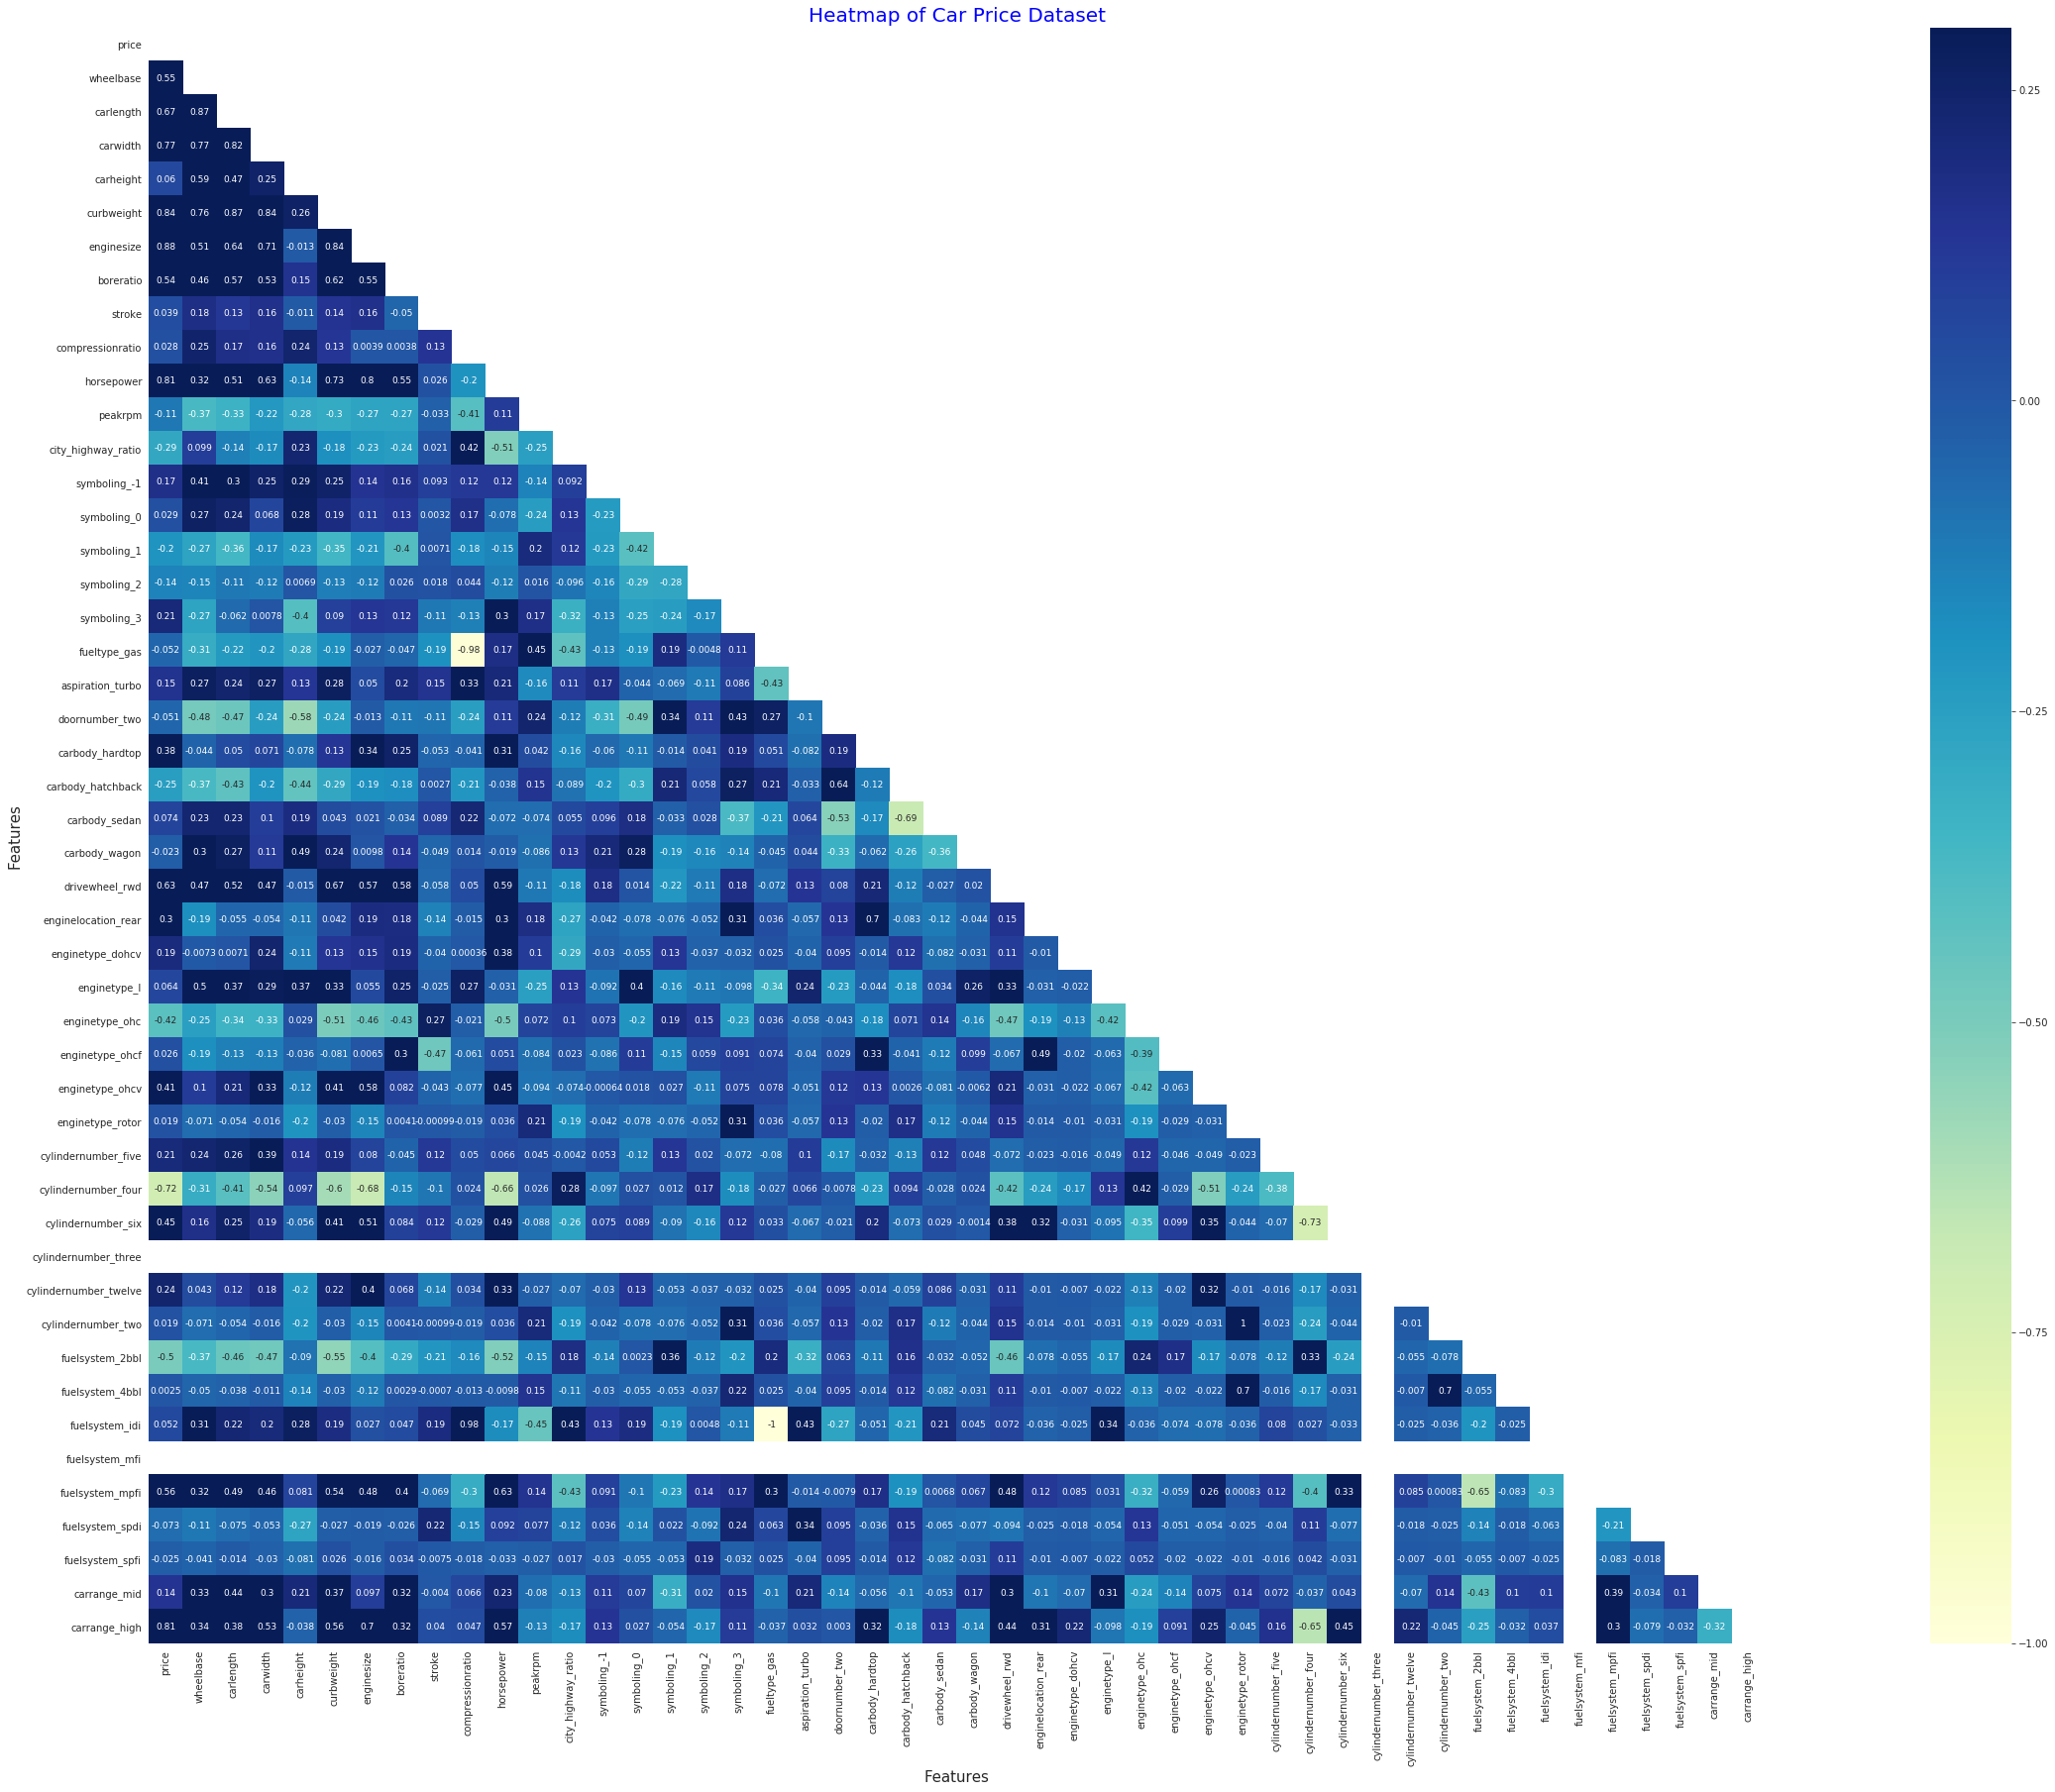

In [255]:
carprice_heatmap(df_train)

In [256]:
#check for unique values for column fuelsystem_mfi in train dataframe
df_train.loc[:,df_train.columns.str.contains('fuelsystem')]['fuelsystem_mfi'].value_counts()

0    143
Name: fuelsystem_mfi, dtype: int64

In [257]:
#check for unique values for column fuelsystem_mfi in test dataframe
df_test.loc[:,df_test.columns.str.contains('fuelsystem')]['fuelsystem_mfi'].value_counts()

0    61
1     1
Name: fuelsystem_mfi, dtype: int64

In [258]:
#check for unique values for column cylindernumber_three in train dataframe
df_train.loc[:,df_train.columns.str.contains('cylindernumber')]['cylindernumber_three'].value_counts()

0    143
Name: cylindernumber_three, dtype: int64

In [259]:
#check for unique values for column cylindernumber_three in test dataframe
df_test.loc[:,df_test.columns.str.contains('cylindernumber')]['cylindernumber_three'].value_counts()

0    61
1     1
Name: cylindernumber_three, dtype: int64

### It can be seen that the features fuelsystem_mfi , cylindernumber_three do not show any association with any other variable 
- This is because there is only one observation in that feature with value 1 rest all observations have 0 value
- During train-test split, the observation with value 1 has been assigned to test dataframe so the correlation matrix has correlation value as Nan wrt other features for train dataset
- Similary the case for cylindernumber_three feature as well

## 12.1 Correlation matrix for highly correlated features in carprice dataframe<a id='Correlation Matrix'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [260]:
carprice_corr = df_train.corr()
carprice_corr.style.apply(lambda x: ["background: lightblue" if abs(v) > 0.5 else "" for v in x], axis = 1)


,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carrange_mid,carrange_high
price,1,0.550372,0.673316,0.771034,0.0598806,0.838979,0.876751,0.543367,0.0393648,0.0279012,0.811184,-0.108121,-0.286202,0.167943,0.0293439,-0.201034,-0.142223,0.210939,-0.0516222,0.149314,-0.0507876,0.377653,-0.248055,0.0742229,-0.0225105,0.633171,0.303115,0.193397,0.0635275,-0.419289,0.0257906,0.414798,0.0188631,0.207303,-0.71804,0.449281,nan,0.242837,0.0188631,-0.499249,0.00254211,0.0516222,nan,0.557544,-0.0730193,-0.0253732,0.140076,0.81322
wheelbase,0.550372,1,0.873137,0.770678,0.587438,0.763689,0.513343,0.457695,0.177613,0.246137,0.315935,-0.365501,0.0988862,0.412046,0.265837,-0.266817,-0.148415,-0.268349,-0.306867,0.274822,-0.483135,-0.044286,-0.368743,0.232968,0.297691,0.469152,-0.185562,-0.00734948,0.504453,-0.248905,-0.187229,0.102905,-0.0714313,0.237441,-0.305537,0.163819,nan,0.042565,-0.0714313,-0.369861,-0.0503314,0.306867,nan,0.321359,-0.110533,-0.0406258,0.326051,0.344343
carlength,0.673316,0.873137,1,0.821267,0.471636,0.868949,0.64346,0.570298,0.125232,0.171994,0.511526,-0.32979,-0.135039,0.300567,0.239438,-0.355282,-0.106953,-0.0620569,-0.224471,0.243677,-0.466742,0.0500078,-0.427451,0.230062,0.274302,0.518003,-0.0554391,0.00709116,0.366129,-0.339831,-0.133004,0.213112,-0.0544758,0.258717,-0.413421,0.253331,nan,0.115689,-0.0544758,-0.460284,-0.0383844,0.224471,nan,0.492965,-0.0745645,-0.0139497,0.44444,0.382128
carwidth,0.771034,0.770678,0.821267,1,0.252645,0.838544,0.710388,0.530869,0.159354,0.160541,0.625418,-0.220357,-0.170104,0.250775,0.0679004,-0.168847,-0.120309,0.00777031,-0.204556,0.265461,-0.242259,0.0710906,-0.199754,0.0996166,0.114182,0.469473,-0.0541627,0.243584,0.286072,-0.334242,-0.1275,0.333749,-0.0158198,0.391426,-0.540921,0.185732,nan,0.177971,-0.0158198,-0.47496,-0.0111468,0.204556,nan,0.461181,-0.0534642,-0.0304446,0.30026,0.53426
carheight,0.0598806,0.587438,0.471636,0.252645,1,0.261443,-0.0134439,0.147698,-0.0112676,0.241545,-0.141868,-0.283489,0.23084,0.289344,0.279902,-0.226228,0.00687795,-0.402198,-0.275555,0.128166,-0.578345,-0.0783608,-0.440377,0.188421,0.492591,-0.0147641,-0.105615,-0.111769,0.36674,0.0294036,-0.036111,-0.123792,-0.201997,0.137742,0.09681,-0.0555808,nan,-0.20345,-0.201997,-0.0897148,-0.14233,0.275555,nan,0.0809044,-0.267439,-0.0812091,0.211487,-0.0379512
curbweight,0.838979,0.763689,0.868949,0.838544,0.261443,1,0.841292,0.622881,0.140339,0.128556,0.73284,-0.297485,-0.183691,0.252473,0.188779,-0.35178,-0.130891,0.0898988,-0.185679,0.277829,-0.242297,0.131419,-0.288119,0.0434384,0.236638,0.672115,0.0418157,0.127804,0.328863,-0.50657,-0.0806062,0.408688,-0.0299126,0.191014,-0.596265,0.411182,nan,0.221953,-0.0299126,-0.548316,-0.0303466,0.185679,nan,0.53655,-0.0265628,0.0259171,0.37399,0.556055
enginesize,0.876751,0.513343,0.64346,0.710388,-0.0134439,0.841292,1,0.553012,0.162573,0.00391011,0.799309,-0.265227,-0.225463,0.141715,0.105035,-0.209184,-0.119543,0.129044,-0.0273844,0.049602,-0.0125814,0.338878,-0.188801,0.0206733,0.00981783,0.568546,0.19321,0.154429,0.0550049,-0.456705,0.00654995,0.579431,-0.150026,0.0801468,-0.681753,0.507453,nan,0.404407,-0.150026,-0.404261,-0.115872,0.0273844,nan,0.477941,-0.0186544,-0.0162871,0.0974158,0.699853
boreratio,0.543367,0.457695,0.570298,0.530869,0.147698,0.622881,0.553012,1,-0.0497096,0.00378918,0.552224,-0.265003,-0.241806,0.159485,0.132387,-0.399

In [261]:
## Find highly correlated columns wrt target variable and correlation coefficient
carprice_corr[abs(carprice_corr['price'])>0.5]['price'].sort_values(ascending=False)

price                  1.000000
enginesize             0.876751
curbweight             0.838979
carrange_high          0.813220
horsepower             0.811184
carwidth               0.771034
carlength              0.673316
drivewheel_rwd         0.633171
fuelsystem_mpfi        0.557544
wheelbase              0.550372
boreratio              0.543367
cylindernumber_four   -0.718040
Name: price, dtype: float64

## Above matrix shows that 'price' column is correlated with 
- around 13 features (list as above)
- engensize is the highly correlated features followed by curbweight, carrange_high, horsepower, carwidth, carlength
- cylindernumber_four, highwaympg, citympg share negative correlation with price column

# 13. Build Linear Regression model - Use RFE <a id='Linear Regression-RFE'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [262]:
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [263]:
# Use RFE for feature selection
rfe = RFE(lr_model,20)
rfe.fit(X_train_scaled,y_train_scaled)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=True),
    n_features_to_select=20, step=1, verbose=0)

In [264]:
#List all features with importance/ranking
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', False, 3),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('city_highway_ratio', True, 1),
 ('symboling_-1', False, 9),
 ('symboling_0', False, 14),
 ('symboling_1', False, 12),
 ('symboling_2', False, 13),
 ('symboling_3', False, 18),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 21),
 ('doornumber_two', False, 19),
 ('carbody_hardtop', False, 11),
 ('carbody_hatchback', False, 7),
 ('carbody_sedan', False, 8),
 ('carbody_wagon', False, 5),
 ('drivewheel_rwd', False, 17),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 4),
 ('enginetype_ohc', False, 26),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 25),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four',

In [265]:
rfe_col = list(X_train_scaled.columns[rfe.support_])
rfe_col

['wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'city_highway_ratio',
 'fueltype_gas',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_ohcv',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_twelve',
 'fuelsystem_idi',
 'carrange_mid',
 'carrange_high']

# 14. Build stats model using RFE selected features<a id='Stats Model-RFE'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Create X_train with RFE selected features

In [266]:
X_train_scaled_rfe = X_train_scaled[rfe_col]
X_train_scaled_rfe.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,fueltype_gas,enginelocation_rear,enginetype_dohcv,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,carrange_mid,carrange_high
177,0.544828,0.284379,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.602273,1,0,0,0,0,1,0,0,0,1,0
75,0.555172,0.485536,0.273438,0.885714,0.500000,0.06250,0.521186,0.346939,0.469697,1,0,0,0,0,1,0,0,0,1,0
174,0.544828,0.294170,0.156250,0.521429,0.609524,0.96875,0.088983,0.142857,0.768595,0,0,0,0,0,1,0,0,1,1,0
31,0.000000,0.000000,0.085938,0.264286,0.638095,0.13750,0.101695,0.755102,0.531100,1,0,0,0,0,1,0,0,0,0,0
12,0.503448,0.396529,0.367188,0.550000,0.533333,0.12500,0.292373,0.040816,0.363636,1,0,0,0,0,0,1,0,0,0,1


### Create X_test with RFE selected features

In [267]:
X_test_scaled_rfe = X_test_scaled[rfe_col]
X_test_scaled_rfe.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_highway_ratio,fueltype_gas,enginelocation_rear,enginetype_dohcv,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_idi,carrange_mid,carrange_high
15,0.582759,0.627948,0.542969,0.771429,0.628571,0.062500,0.550847,0.510204,0.305785,1,0,0,0,0,0,1,0,0,0,1
9,0.444828,0.549177,0.238281,0.421429,0.633333,0.000000,0.457627,0.551020,0.305785,1,0,0,0,1,0,0,0,0,1,0
100,0.365517,0.214953,0.195312,0.564286,0.666667,0.093750,0.190678,0.428571,0.475936,1,0,0,0,0,1,0,0,0,0,0
132,0.431034,0.373387,0.199219,0.714286,0.476190,0.144375,0.245763,0.448980,0.363636,1,0,0,0,0,1,0,0,0,1,0
68,0.806897,0.859368,0.441406,0.742857,0.747619,0.906250,0.300847,0.081633,0.694545,0,0,0,0,1,0,0,0,1,0,1


## 14.1 Functions to use RFE on fetures, build model and check VIF<a id='Common Function for model building'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [268]:
def check_rfe(X_df,y_df,col_list):
    lr_model1 = LinearRegression(normalize=True)
    lr_model1.fit(X_df[col_list],y_df)
    # Use RFE for feature selection
    rfe1 = RFE(lr_model1,1)
    rfe1.fit(X_train_scaled[col_list],y_df)
    #List all features with importance/ranking
    print(list(zip(col_list,rfe1.support_,rfe1.ranking_)))

In [269]:
def build_statsmodel(X_df,y_df):
    #add constant. Its because intercept might not pass through origin
    #By default its not added in stats model
    #we have to add constant explicitly
    X_train_sm = sm.add_constant(X_df)

    lr = sm.OLS(y_df,X_train_sm).fit()
    ## Print the params obtained
    print('************ feature - coefficients *****************')
    print(round(lr.params,4))
    print('*****************************************************')
    print()
    print()
    ## Print stats model summary
    print(lr.summary())
    return lr,X_train_sm

In [270]:
def check_vif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values,i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# 15. Build Model<a id='Build Model'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## 15.1 Model 1:<a id='Model 1'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [271]:
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1051
wheelbase                0.0625
curbweight               0.0735
enginesize               0.5464
boreratio               -0.0827
stroke                  -0.1303
compressionratio         0.0136
horsepower               0.2556
peakrpm                  0.0822
city_highway_ratio      -0.0581
fueltype_gas             0.0296
enginelocation_rear      0.0791
enginetype_dohcv        -0.2595
enginetype_ohcv         -0.0459
cylindernumber_five     -0.0615
cylindernumber_four     -0.0966
cylindernumber_six      -0.1646
cylindernumber_twelve   -0.3588
fuelsystem_idi           0.0755
carrange_mid             0.0570
carrange_high            0.2529
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. 

### From above statistics
- We have got R-squared of 0.963 and Adjusted R-squared of 0.957. 
- Overall significance of model is 165.9
- Lets further check multicolinearity within fetaures

# 15.1a Important Assumptions<a id='Important Assumptions'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [272]:
carprice_df[['price','enginesize','horsepower']].corr()

,price,enginesize,horsepower
price,1.000000,0.874145,0.808139
enginesize,0.874145,1.000000,0.809769
horsepower,0.808139,0.809769,1.000000


- As can be seen enginesize and horsepower features have veru high correlation with target feature price
- Also if we see from first model, coefficients of these two features are higher
- So with this, we will not drop these two columns
- We will consider these two features as important for any business to predict car price in automobile industry
- <b><font size = 3 color = "blue">With this assumption, we will ignore VIF of these two features and will try to build and refine models and will check for Adjusted R-squared and oevrall significance of model in the end
- While checking VIF, we have added constant in stats model. We will ignore VIF of const as well during evaluation of VIF</font> </b>
- It can be cross checked from this link under step one that we must add constant while building stats regression model https://en.wikipedia.org/wiki/Variance_inflation_factor
- While dropping a feature we cannot merely check VIF and drop the feature based on high multicolinearity. We also have to check the overall significance of the model if the feature is dropped. So we will consider p-value, VIF and coefficient and in the end if needed build RFE model to select lowest ranked feature to drop the feature
- We will also plot final features with coefficients in the end to get a better view of predictors and to finally validate if our assumption holds valid

### Checking VIF

In [273]:
check_vif(X_train_sm)

,Features,VIF
10,fueltype_gas,inf
18,fuelsystem_idi,inf
6,compressionratio,62.06
3,enginesize,14.41
2,curbweight,12.90
7,horsepower,12.05
15,cylindernumber_four,8.94
16,cylindernumber_six,5.00
20,carrange_high,4.76
1,wheelbase,4.08


### From above table
- fueltype_gas and fuelsystem_idi has VIF 'inf'. This means VIF of these features can be completely explained by rest of the features available in above table
- For this reason we should drop these features and rebuild model

## 15.2 Model 2:<a id='Model 2'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Dropping variable and updating model one by one

In [274]:
## Drop feature fueltype_gas since it has high p-value and high VIF
X_train_scaled_rfe.drop(columns=['fueltype_gas'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1347
wheelbase                0.0625
curbweight               0.0735
enginesize               0.5464
boreratio               -0.0827
stroke                  -0.1303
compressionratio         0.0136
horsepower               0.2556
peakrpm                  0.0822
city_highway_ratio      -0.0581
enginelocation_rear      0.0791
enginetype_dohcv        -0.2595
enginetype_ohcv         -0.0459
cylindernumber_five     -0.0615
cylindernumber_four     -0.0966
cylindernumber_six      -0.1646
cylindernumber_twelve   -0.3588
fuelsystem_idi           0.0459
carrange_mid             0.0570
carrange_high            0.2529
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.95

### From above statistics
- We have got R-squared of 0.963 and Adjusted R-squared of 0.957. 
- Overall signifiocance of model is 168.2
- There is no change in overall model significance and adjusted r-squared. This means that the feature that we dropped while building this model was not significant
- Lets further check multicolinearity within fetaures

In [275]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,165.25
17,fuelsystem_idi,65.72
6,compressionratio,62.06
3,enginesize,14.41
2,curbweight,12.90
7,horsepower,12.05
14,cylindernumber_four,8.94
15,cylindernumber_six,5.00
19,carrange_high,4.76
1,wheelbase,4.08


### Observations from above table
- compressionratio has VIF (62.06), p-value is also 0.905
- fuelsystem_idi has highest VIF(65.72) and p-value lesser than compressionratio. 
- Since compressionratio is the least significant feature with high VIF as well so we will drop this feature first and check for adjusted r-squared and overall significance of model

## 15.3 Model 3:<a id='Model 3'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [276]:
## drop feature compressionratio since it has high p-value and high VIF
X_train_scaled_rfe.drop(columns=['compressionratio'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1371
wheelbase                0.0624
curbweight               0.0723
enginesize               0.5475
boreratio               -0.0823
stroke                  -0.1312
horsepower               0.2522
peakrpm                  0.0834
city_highway_ratio      -0.0584
enginelocation_rear      0.0791
enginetype_dohcv        -0.2571
enginetype_ohcv         -0.0459
cylindernumber_five     -0.0619
cylindernumber_four     -0.0969
cylindernumber_six      -0.1641
cylindernumber_twelve   -0.3553
fuelsystem_idi           0.0574
carrange_mid             0.0573
carrange_high            0.2534
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least 

### From above statistics
- We have got R-squared of 0.963 and Adjusted R-squared of 0.958. 
- Overall significance of model is 179.0. Overall significance of model has increased by 0.001. This means the feature that we just dropped was highly dependent on other variables. Dropping it has improved the model significance
- Lets further check multicolinearity within fetaures

In [277]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,130.20
3,enginesize,14.22
2,curbweight,12.46
6,horsepower,10.08
13,cylindernumber_four,8.82
14,cylindernumber_six,4.85
18,carrange_high,4.57
1,wheelbase,4.08
4,boreratio,3.09
11,enginetype_ohcv,2.97


### From above table
- feature curbweight has very high VIF and high p-value
- we can try dropping this variable and will check for the model significance and adjusted r-squared value

## 15.4 Model 4:<a id='Model 4'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [278]:
## drop feature citympg since it has high p-value and high VIF## Model 1:
X_train_scaled_rfe.drop(columns=['curbweight'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1353
wheelbase                0.0897
enginesize               0.5861
boreratio               -0.0781
stroke                  -0.1351
horsepower               0.2814
peakrpm                  0.0820
city_highway_ratio      -0.0621
enginelocation_rear      0.0677
enginetype_dohcv        -0.2703
enginetype_ohcv         -0.0451
cylindernumber_five     -0.0595
cylindernumber_four     -0.0979
cylindernumber_six      -0.1649
cylindernumber_twelve   -0.3675
fuelsystem_idi           0.0642
carrange_mid             0.0616
carrange_high            0.2566
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:          

### From above statistics
- We have got R-squared of 0.962 and Adjusted R-squared of 0.957. Adjusted R-squared has dropped by 0.001 which is ok
- Overall signifiocance of model is 187.9. The overall significance of model has improved. This means it was worth dropping the feature
- Lets further check multicolinearity within fetaures

In [279]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,130.07
2,enginesize,12.50
5,horsepower,8.98
12,cylindernumber_four,8.81
13,cylindernumber_six,4.85
17,carrange_high,4.52
3,boreratio,3.07
10,enginetype_ohcv,2.97
1,wheelbase,2.65
11,cylindernumber_five,2.46


### Observations from above table
- enginelocation_rear has high p-value of 0.087. This means this feature is not significant. Coefficient of enginelocation_rear is also less so we will drop this feature first and will check for adjusted r-squared and overall significance of model

## 15.5 Model 5:<a id='Model 5'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [280]:
## drop feature enginelocation_rear
X_train_scaled_rfe.drop(columns=['enginelocation_rear'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1397
wheelbase                0.0711
enginesize               0.6084
boreratio               -0.0720
stroke                  -0.1486
horsepower               0.2881
peakrpm                  0.0928
city_highway_ratio      -0.0684
enginetype_dohcv        -0.2952
enginetype_ohcv         -0.0553
cylindernumber_five     -0.0579
cylindernumber_four     -0.0970
cylindernumber_six      -0.1601
cylindernumber_twelve   -0.3846
fuelsystem_idi           0.0730
carrange_mid             0.0605
carrange_high            0.2598
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     196.4
Date:          

### From above statistics
- We have got R-squared of 0.961 and Adjusted R-squared of 0.957. There is no difference in adjusted r-squared 
- Overall significance of model has increased to 196.4 which is higher than previous model. This means our decision to drop this feature was good
- Lets further check multicolinearity within fetaures

In [281]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,129.51
2,enginesize,12.12
5,horsepower,8.95
11,cylindernumber_four,8.81
12,cylindernumber_six,4.78
16,carrange_high,4.49
3,boreratio,3.02
9,enginetype_ohcv,2.79
10,cylindernumber_five,2.46
15,carrange_mid,2.39


### Observations from above table
- Now here if we see, VIF of cylindernumber_four is high, also at the same time coefficient is also high(ignore negative sign). So it will not be wise to drop this feature
- On the other hand, enginetype_ohcv has low VIF but the coefficient is the least, even though p-value is 0.019 so we can drop this feature
- But before doing so, lets feed all these features along with few more depending on the p-value and VIF and choose the lowest ranked feature to drop

## 15.6 Model 6:<a id='Model 6'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [282]:
col_list = ['cylindernumber_four','cylindernumber_six','wheelbase','boreratio','city_highway_ratio',
            'enginetype_ohcv','cylindernumber_five']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('cylindernumber_four', False, 2), ('cylindernumber_six', False, 5), ('wheelbase', False, 3), ('boreratio', True, 1), ('city_highway_ratio', False, 6), ('enginetype_ohcv', False, 7), ('cylindernumber_five', False, 4)]


- From above we can see that RFE also has chosen enginetype_ohcv as the least ranked feature so lets go ahead and drop this feature

In [283]:
## drop feature highwaympg
X_train_scaled_rfe.drop(columns=['enginetype_ohcv'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.1058
wheelbase                0.0816
enginesize               0.5251
boreratio               -0.0517
stroke                  -0.1316
horsepower               0.2861
peakrpm                  0.0937
city_highway_ratio      -0.0733
enginetype_dohcv        -0.2693
cylindernumber_five     -0.0341
cylindernumber_four     -0.0719
cylindernumber_six      -0.1417
cylindernumber_twelve   -0.3646
fuelsystem_idi           0.0724
carrange_mid             0.0615
carrange_high            0.2796
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 20 Jan 2020   Prob (F

### From above statistics
- We have got R-squared of 0.960 and Adjusted R-squared of 0.955. The adjusted r-squared has decreased by 0.002 which is still ok 
- Overall significance of model has increased to 201.7 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [284]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,111.73
2,enginesize,9.32
5,horsepower,8.94
10,cylindernumber_four,7.22
11,cylindernumber_six,4.23
15,carrange_high,3.83
3,boreratio,2.78
14,carrange_mid,2.39
6,peakrpm,2.18
9,cylindernumber_five,2.16


### Observations from above table
- Now here if we see, VIF of cylindernumber_four is high, also at the same time coefficient is also high(ignore negative sign). So it will not be wise to drop this feature
- On the other hand, city_highway_ratio has low VIF and the coefficient is the low, even though p-value is 0.020 so we can drop this feature
- But before doing so, lets feed all these features along with few more depending on the p-value and VIF and choose the lowest ranked feature to drop

## 15.7 Model 7:<a id='Model 7'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [285]:
col_list = ['cylindernumber_four','cylindernumber_six','wheelbase','boreratio','city_highway_ratio',
            'cylindernumber_five']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('cylindernumber_four', False, 2), ('cylindernumber_six', False, 5), ('wheelbase', False, 3), ('boreratio', True, 1), ('city_highway_ratio', False, 6), ('cylindernumber_five', False, 4)]


- From above RFE model we can see that city_highway_ratio is the least ranked feature so lets drop it

In [286]:
X_train_scaled_rfe.drop(columns=['city_highway_ratio'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0588
wheelbase                0.0727
enginesize               0.4894
boreratio               -0.0427
stroke                  -0.1217
horsepower               0.3274
peakrpm                  0.0883
enginetype_dohcv        -0.2556
cylindernumber_five     -0.0298
cylindernumber_four     -0.0708
cylindernumber_six      -0.1356
cylindernumber_twelve   -0.3549
fuelsystem_idi           0.0586
carrange_mid             0.0638
carrange_high            0.2833
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.45e-81


### From above statistics
- We have got R-squared of 0.958 and Adjusted R-squared of 0.953. The adjusted r-squared has decreased by 0.002 which is still ok 
- Overall significance of model has increased to 20.8.3 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [287]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,78.54
2,enginesize,8.83
5,horsepower,8.20
9,cylindernumber_four,7.22
10,cylindernumber_six,4.17
14,carrange_high,3.80
3,boreratio,2.74
13,carrange_mid,2.37
6,peakrpm,2.16
8,cylindernumber_five,2.15


### Observations from above table
- Now here if we see, VIF of cylindernumber_four is high, also at the same time coefficient is also high(ignore negative sign). So it will not be wise to drop this feature
- On the other hand, enginetype_ohcv has low VIF but the coefficient is the least, also though p-value is very high 0.290 meaning not signoficant feature so we can drop this feature
- But before doing so, lets feed all these features along with few more depending on the p-value and VIF and choose the lowest ranked feature to drop

## 15.8 Model 8:<a id='Model 8'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [288]:
col_list = ['cylindernumber_four','wheelbase','boreratio',
            'cylindernumber_five']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('cylindernumber_four', False, 2), ('wheelbase', False, 3), ('boreratio', True, 1), ('cylindernumber_five', False, 4)]


- From above RFE model we can see that cylindernumber_five os the least ranked feature so we can drop it

In [289]:
## drop feature boreratio
X_train_scaled_rfe.drop(columns=['cylindernumber_five'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0445
wheelbase                0.0684
enginesize               0.5036
boreratio               -0.0430
stroke                  -0.1258
horsepower               0.3265
peakrpm                  0.0887
enginetype_dohcv        -0.2436
cylindernumber_four     -0.0546
cylindernumber_six      -0.1221
cylindernumber_twelve   -0.3500
fuelsystem_idi           0.0583
carrange_mid             0.0635
carrange_high            0.2830
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.66e-82
Time:                        09:

### From above statistics
- We have got R-squared of 0.958 and Adjusted R-squared of 0.953. There is no change in adjusted R-squared 
- Overall significance of model has increased to 224.0 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [290]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,63.72
2,enginesize,8.45
5,horsepower,8.20
8,cylindernumber_four,4.14
13,carrange_high,3.80
9,cylindernumber_six,2.79
3,boreratio,2.74
12,carrange_mid,2.36
6,peakrpm,2.16
1,wheelbase,2.02


### Observations from above table
- Now here if we see p-value of boreratio is very high and coefficient is also very least so we can drop this column

## 15.9 Model 9:<a id='Model 9'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [291]:
## drop feature boreratio
X_train_scaled_rfe.drop(columns=['boreratio'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0340
wheelbase                0.0641
enginesize               0.4848
stroke                  -0.1186
horsepower               0.2957
peakrpm                  0.0972
enginetype_dohcv        -0.2396
cylindernumber_four     -0.0639
cylindernumber_six      -0.1175
cylindernumber_twelve   -0.3237
fuelsystem_idi           0.0582
carrange_mid             0.0613
carrange_high            0.2797
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.68e-82
Time:                        09:36:26   Log-Likelihood:         

### From above statistics
- We have got R-squared of 0.956 and Adjusted R-squared of 0.953. There is no change in adjusted R-Squared 
- Overall significance of model has increased to 240.6 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [292]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,59.38
2,enginesize,8.09
4,horsepower,7.11
12,carrange_high,3.76
7,cylindernumber_four,3.59
8,cylindernumber_six,2.71
11,carrange_mid,2.32
5,peakrpm,2.05
1,wheelbase,1.99
9,cylindernumber_twelve,1.61


### Observations from above table
- Now since we have assumed that enginesize and horsepower are important business features so we will not drop these features
- VIF of all other features is ok
- p-values of all other features is within the range so if we see the coefficent values, fuelsystem_idi has the least coefficient so we will try to drop this feature and wil then check for adjusted r-squared and overall significance of model

## 15.10 Model 10:<a id='Model 10'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [293]:
## drop feature fuelsystem_idi
X_train_scaled_rfe.drop(columns=['fuelsystem_idi'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0404
wheelbase                0.0798
enginesize               0.4596
stroke                  -0.0962
horsepower               0.2644
peakrpm                  0.0679
enginetype_dohcv        -0.2115
cylindernumber_four     -0.0651
cylindernumber_six      -0.1156
cylindernumber_twelve   -0.2941
carrange_mid             0.0680
carrange_high            0.2912
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     237.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.78e-81
Time:                        09:36:26   Log-Likelihood:                 249.28
No. Observations:

### From above statistics
- We have got R-squared of 0.952 and Adjusted R-squared of 0.948. The adjusted r-squared has decreased by 0.005
- Overall significance of model has increased to 237.7 which is lower than previous model. This means our decision to drop this feature might not be good since the overall significance has dropped a bit from 240.6 to 237.7
- Lets further check multicolinearity within fetaures

In [294]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,59.14
2,enginesize,7.99
4,horsepower,6.94
11,carrange_high,3.67
7,cylindernumber_four,3.59
8,cylindernumber_six,2.70
10,carrange_mid,2.25
1,wheelbase,1.93
5,peakrpm,1.86
9,cylindernumber_twelve,1.58


## 15.11 Model 11:<a id='Model 11'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Observation from above table
- Now we will still try further to bring down VIF of anginesize and horsepower features by dropping other features in selective way
- For this we will choose carrange_high, cylindernumber_four with VIF<3.6 and wheelbase, stroke and peakrpm (because of p-values)
- we will feed these features to RFE model and will check the least ranked feature

In [295]:
col_list = ['carrange_high','cylindernumber_four','wheelbase',
            'stroke','peakrpm']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('carrange_high', True, 1), ('cylindernumber_four', False, 3), ('wheelbase', False, 2), ('stroke', False, 4), ('peakrpm', False, 5)]


- From above RFE model, peakrpm is the least ranked feature so we will drop this feature

In [296]:
## drop feature peakrpm
X_train_scaled_rfe.drop(columns=['peakrpm'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0756
wheelbase                0.0702
enginesize               0.3714
stroke                  -0.0836
horsepower               0.3504
enginetype_dohcv        -0.2432
cylindernumber_four     -0.0732
cylindernumber_six      -0.1253
cylindernumber_twelve   -0.2916
carrange_mid             0.0625
carrange_high            0.2896
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.53e-80
Time:                        09:36:26   Log-Likelihood:                 245.49
No. Observations:                 143   AIC:     

### From above statistics
- We have got R-squared of 0.950 and Adjusted R-squared of 0.946. The adjusted r-squared has decreased by 0.002 which is ok
- Overall significance of model has increased to 249.2 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [297]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,46.43
2,enginesize,5.92
4,horsepower,4.75
10,carrange_high,3.67
6,cylindernumber_four,3.48
7,cylindernumber_six,2.60
9,carrange_mid,2.18
1,wheelbase,1.89
8,cylindernumber_twelve,1.58
5,enginetype_dohcv,1.50


### Observations from above table
- VIF of enginesize has improved from 7.99 to 5.92. Also horsepower feature's VIF is under 5 now. This means it was good to drop peakrpm feature
- Now we will still try further to bring down VIF of anginesize features by dropping other features in selective way
- For this we will choose carrange_high, cylindernumber_four with VIF<3.5 and wheelbase, stroke(because of p-values)
- we will feed these features to RFE model and will check the least ranked feature

## 15.12 Model 12:<a id='Model 12'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [298]:
col_list = ['carrange_high','cylindernumber_four','wheelbase',
            'stroke']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('carrange_high', True, 1), ('cylindernumber_four', False, 3), ('wheelbase', False, 2), ('stroke', False, 4)]


- From above RFE model feature stroke is the least ranked feature so we will drop this feature

In [299]:
## drop feature fuelsystem_idi
X_train_scaled_rfe.drop(columns=['stroke'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                    0.0320
wheelbase                0.0639
enginesize               0.3289
horsepower               0.3649
enginetype_dohcv        -0.2428
cylindernumber_four     -0.0711
cylindernumber_six      -0.1257
cylindernumber_twelve   -0.2544
carrange_mid             0.0667
carrange_high            0.3015
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     260.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.99e-80
Time:                        09:36:26   Log-Likelihood:                 240.78
No. Observations:                 143   AIC:                            -461.6
Df

### From above statistics
- We have got R-squared of 0.946 and Adjusted R-squared of 0.943. The adjusted r-squared has decreased by 0.003
- Overall significance of model has increased to 260.2 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [300]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,31.66
2,enginesize,5.55
3,horsepower,4.70
9,carrange_high,3.55
5,cylindernumber_four,3.47
6,cylindernumber_six,2.60
8,carrange_mid,2.14
1,wheelbase,1.88
4,enginetype_dohcv,1.50
7,cylindernumber_twelve,1.50


### Observations from above table
- VIF of enginesize has improved from 5.92 to 5.55. Also horsepower feature's VIF has reduced from 4.75 to 4.70. This means it was good to drop stroke feature
- Now we will still try further to bring down VIF of anginesize features by dropping other features in selective way
- For this we will choose carrange_high, cylindernumber_four with VIF<3.4 and wheelbase, stroke(because of p-values)
- we will feed these features to RFE model and will check the least ranked feature

## 15.13 Model 13:<a id='Model 13'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [301]:
col_list = ['carrange_high','cylindernumber_four','wheelbase']
check_rfe(X_train_scaled,y_train_scaled,col_list)

[('carrange_high', True, 1), ('cylindernumber_four', False, 3), ('wheelbase', False, 2)]


- From above RFE model we can see that cylindernumber_four is the least ranked featiure so we will drop this feature

In [302]:
## drop feature peakrpm
X_train_scaled_rfe.drop(columns=['cylindernumber_four'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                   -0.0440
wheelbase                0.0660
enginesize               0.3443
horsepower               0.3850
enginetype_dohcv        -0.2210
cylindernumber_six      -0.0822
cylindernumber_twelve   -0.2380
carrange_mid             0.0711
carrange_high            0.3267
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     262.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.21e-78
Time:                        09:36:26   Log-Likelihood:                 232.90
No. Observations:                 143   AIC:                            -447.8
Df Residuals:                     

### From above statistics
- const coefficient has become negative
- We have got R-squared of 0.940 and Adjusted R-squared of 0.936. The adjusted r-squared has decreased by 0.007
- Overall significance of model has increased to 262.4 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [303]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,7.10
2,enginesize,5.53
3,horsepower,4.65
8,carrange_high,3.25
7,carrange_mid,2.12
1,wheelbase,1.87
5,cylindernumber_six,1.76
6,cylindernumber_twelve,1.49
4,enginetype_dohcv,1.48


### Observations from above table
- VIF of enginesize has improved from 5.55 to 5.53. Also horsepower feature's VIF has reduced from 4.70 to 4.65. This means it was good to drop stroke feature
- Now we will still try further to bring down VIF of anginesize features by dropping other features in selective way
- For this we will drop wheelbase since its with the lowest coefficient value (p-value and VIF are within range)

## 15.14 Model 14: Final Model<a id='Model 14'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [304]:
## drop feature peakrpm
X_train_scaled_rfe.drop(columns=['wheelbase'],inplace=True)
lr,X_train_sm = build_statsmodel(X_train_scaled_rfe,y_train_scaled)

************ feature - coefficients *****************
const                   -0.0280
enginesize               0.4058
horsepower               0.3518
enginetype_dohcv        -0.2228
cylindernumber_six      -0.0896
cylindernumber_twelve   -0.2648
carrange_mid             0.0837
carrange_high            0.3405
dtype: float64
*****************************************************


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.65e-78
Time:                        09:36:26   Log-Likelihood:                 229.76
No. Observations:                 143   AIC:                            -443.5
Df Residuals:                     135   BIC:                      

### From above statistics
- We have got R-squared of 0.937 and Adjusted R-squared of 0.934. The adjusted r-squared has decreased by 0.002 which is ok
- Overall significance of model has increased to 288.3 which is higher than previous model. This means our decision to drop this feature was good since the overall significance of model has improved
- Lets further check multicolinearity within fetaures

In [305]:
## Check VIF
check_vif(X_train_sm)

,Features,VIF
0,const,4.56
1,enginesize,4.56
2,horsepower,4.33
7,carrange_high,3.04
6,carrange_mid,1.74
4,cylindernumber_six,1.70
3,enginetype_dohcv,1.48
5,cylindernumber_twelve,1.45


## Observation from above plot
- VIF values are within the range
- We will stop at this point and will use this final model for test predictions

# 16. Residual Analysis of the train data<a id='Residual Analysis'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [306]:
#y_train_price = lr.predict(X_train_sm)
y_train_price = pd.DataFrame(lr.predict(X_train_sm),columns=['price'],index=X_train_sm.index)

In [307]:
y_train_price.head()

,price
177,0.197804
75,0.350079
174,0.150455
31,0.042694
12,0.474837


In [308]:
y_train_scaled.head()

,price
177,0.152177
75,0.282632
174,0.138523
31,0.043121
12,0.393526


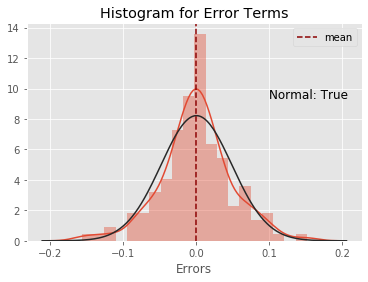

In [309]:
sns.distplot((y_train_scaled - y_train_price), bins = 20,fit=norm, kde=True) 
mean_val = (y_train_scaled - y_train_price).mean()[0]

#runs D’Agostino's normality test to print on graph
#The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, 
#to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.
#Skew is a quantification of how much a distribution is pushed left or right, 
#a measure of asymmetry in the distribution.
#Kurtosis quantifies how much of the distribution is in the tail. 
#It is a simple and commonly used statistical test for normality.

normality_test = stats.normaltest((y_train_scaled - y_train_price)).pvalue < 0.05
plt.title("Histogram for Error Terms")
plt.xlabel('Errors') 
plt.axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
plt.text(0.1, 10, "Normal: {}".format(not normality_test), ha="left", va="top", fontsize=12)
plt.legend();

### Observations from above plot
- It can be seen that the error terms follow a normal distribution and the errors are equally distributed on both sides of the mean

# 17. Make predictions using final model<a id='Predictions'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [310]:
X_train_sm.drop(columns=['const'],inplace=True)
rfe_col = list(X_train_sm.columns)
print('final list of columns: {0}'.format(rfe_col))

final list of columns: ['enginesize', 'horsepower', 'enginetype_dohcv', 'cylindernumber_six', 'cylindernumber_twelve', 'carrange_mid', 'carrange_high']


# With Stats Model

In [311]:
#add constant to X_test_scaled
X_test_sm = sm.add_constant(X_test_scaled_rfe[rfe_col])
X_test_sm.head()

,const,enginesize,horsepower,enginetype_dohcv,cylindernumber_six,cylindernumber_twelve,carrange_mid,carrange_high
15,1.0,0.542969,0.550847,0,1,0,0,1
9,1.0,0.238281,0.457627,0,0,0,1,0
100,1.0,0.195312,0.190678,0,0,0,0,0
132,1.0,0.199219,0.245763,0,0,0,1,0
68,1.0,0.441406,0.300847,0,0,0,0,1


In [312]:
# make prediction on test using final model
y_test_pred = pd.DataFrame(lr.predict(X_test_sm),columns=['price'],index=X_test_sm.index)
y_test_pred.head()

,price
15,0.637116
9,0.313448
100,0.118390
132,0.223054
68,0.597545


In [313]:
y_test_scaled.head()

,price
15,0.636562
9,0.316299
100,0.110000
132,0.167122
68,0.574202


# 18. Model Evaluation and Summary<a id='Model Evaluation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

Text(0, 0.5, 'y_pred')

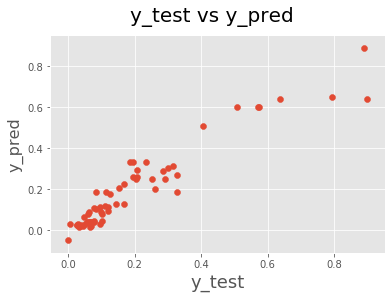

In [314]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_scaled, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

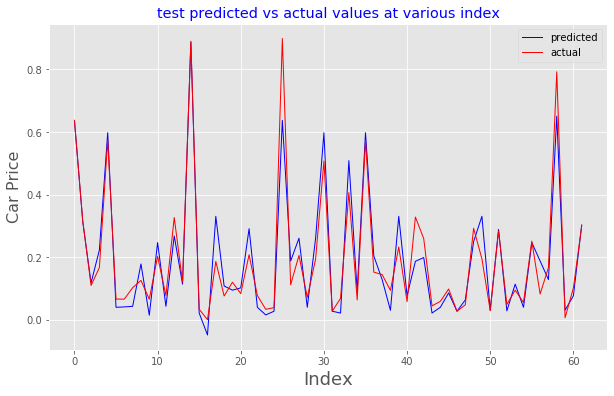

In [326]:
# Actual vs Predicted
items=len(list(y_test_scaled.index.sort_values()))
c = [i for i in range(0,items,1)]
d = [i for i in range(0,items,1)]
plt.figure(figsize=(10,6))
plt.plot(c, y_test_pred, color="blue", linewidth=1, linestyle="-", label='predicted')     #Plotting predicted
plt.plot(d, y_test_scaled, color="red",  linewidth=1, linestyle="-", label='actual')  #Plotting Actual
plt.title('test predicted vs actual values at various index',color='blue')
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.legend()
plt.show()

## Observations from above plot
- car price of actual and predicted are almost in sync. Predicted prices are almost following the same pattern as of actual prices
- There are few obervations where predicted prices are high like at index number 7,10,17,27,39 whereas model predicted low prices for some observations like at index 5,11,16,21,22,38 but overall it shows the predictions are good

## 18.1 r2-score<a id='r2 score'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [316]:
#r2 score on traion set
r2_score(y_train_scaled, y_train_price)

0.9373056719941261

In [317]:
#r2 score on test set
r2_score(y_test_scaled, y_test_pred)

0.9031492086981042

## 18.2 RMSE (root mean squared error)<a id='rmse'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [318]:
#root mean squared error
round(np.sqrt(mean_squared_error(y_test_scaled, y_test_pred)),2)

0.06

In [319]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.65e-78
Time:                        09:36:27   Log-Likelihood:                 229.76
No. Observations:                 143   AIC:                            -443.5
Df Residuals:                     135   BIC:                            -419.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0280      0.009     -3.135      0.002      -0.046      -0.010
enginesize                0.4058      0.055      7.343      0.000       0.297       0.515
horsepower                0.3518      0.051      6.894      0.000       0.251       0.453
enginetype_dohcv         -0.2228      0.061     -3.648      0.000      -0.344      -0.102
cylindernumber_six       -0.0896      0.017     -5.319      0.000      -0.123      -0.056
cylindernumber_twelve    -0.2648      0.060     -4.395      0.000      -0.384      -0.146
carrange_mid              0.0837      0.011      7.478      0.000       0.062       0.106
carrange_high             0.3405      0.022     15.505      0.000       0.297       0.384
==============================================================================
Omnibus:                        5.209   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                7.233
Skew:                          -0.103   Prob(JB):                       0.0269
Kurtosis:                       4.082   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Summary
- r2 score of train and test have a difference of 0.034 and are well within the range
- root mean squared error is also quite low (0.06) which depicts a good model
- r-squared of final model is 0.937 and adjusted r-squaredis 0.934, it means that 93.4% of the variation in car prices can be explained by the model

## 18.3 Residuals vs. Predictions<a id='residual vs prediction'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

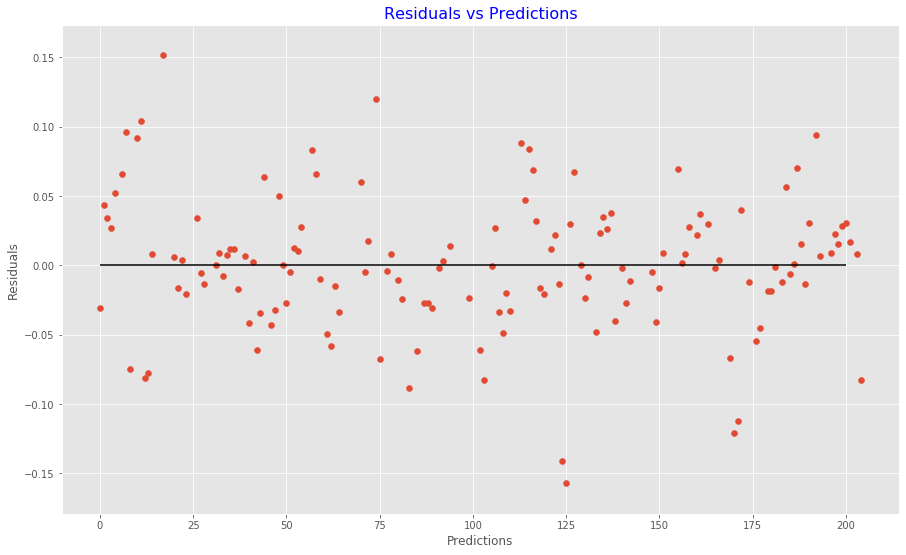

In [320]:
fitted_vals = lr.predict()
resids = lr.resid

plt.figure(figsize=(15,9))
plt.scatter(resids.index, resids.values)
plt.title('Residuals vs Predictions', fontsize=16, color ='blue')
plt.xlabel('Predictions')
plt.ylabel('Residuals')

plt.hlines(0,0,200);

## Observations from above plot
- the error terms are homoscedastic thus depicting a good fit of model

## 18.4 Lets plot features and respective coefficients from stats regression model as well<a id='top predictors and coefficients'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [321]:
params_df = pd.DataFrame(columns=['coefficient'],data=lr.params).reset_index()
params_df.rename(columns={'index':'feature'},inplace=True)
params_df.drop(index=0,inplace=True)
params_df

,feature,coefficient
1,enginesize,0.405837
2,horsepower,0.351836
3,enginetype_dohcv,-0.222775
4,cylindernumber_six,-0.089606
5,cylindernumber_twelve,-0.264823
6,carrange_mid,0.083697
7,carrange_high,0.340519


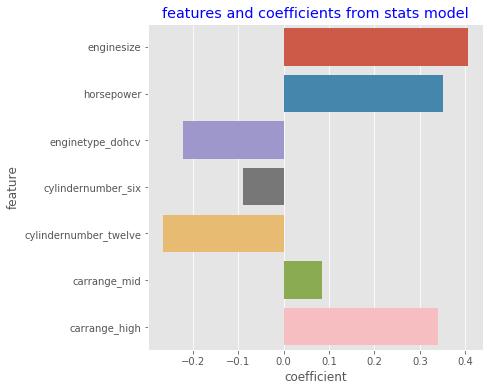

In [322]:
plt.figure(figsize=(6,6))
plt.title('features and coefficients from stats model',color='blue')
sns.barplot(y='feature',x='coefficient',data=params_df);

## Observations from above plot
- 4 features enginesize, horsepower, carrange_mid, carrange_high have positive relationship with dependent varaible. This means as the value of these predictors increases, the value of dependent variable also increases
- 3 features enginetype_dohcv, cyclindernumber_six, cylindernumber_twelve have negative relationship with dependent variable. This means as the value of these predictors increases, the value of dependent variable decreases
- Amongst the positive predictors, enginesize has the highest coefficient value (0.405837). This means the mean response value increases by 0.405837 for every one unit change in the predictor
- Amongst the negative predictors, cylindernumber_twelve has the highest coefficient value (0.264823)(ignoring negative sign since we are referring to negatuve predictor already) . This means the mean response value decreases by 0.264823 for every one unit change in the predictor
- <b><font size = 3 color = "blue">We can see that our assumption enginesize and horsepower as important predictors holds true where enginesize being the highest predictor</font></b>